___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

# clustering algoritmalarında domain knowledge daha da bir ön plana çıkıyor demiştik (örn:iris dataset)
# ama burada yapacağımız customer segmantation'da domain knowledge'a o kadar da ihtiyaç yoktur

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)
# column isimlerini yazarken kolaylık olması için bir düzenleme yaptık

In [4]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
df.drop(columns= "CustomerID", inplace=True)
# CustomerID bizim için index gibi o yüzden onu drop ediyoruz.

In [9]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





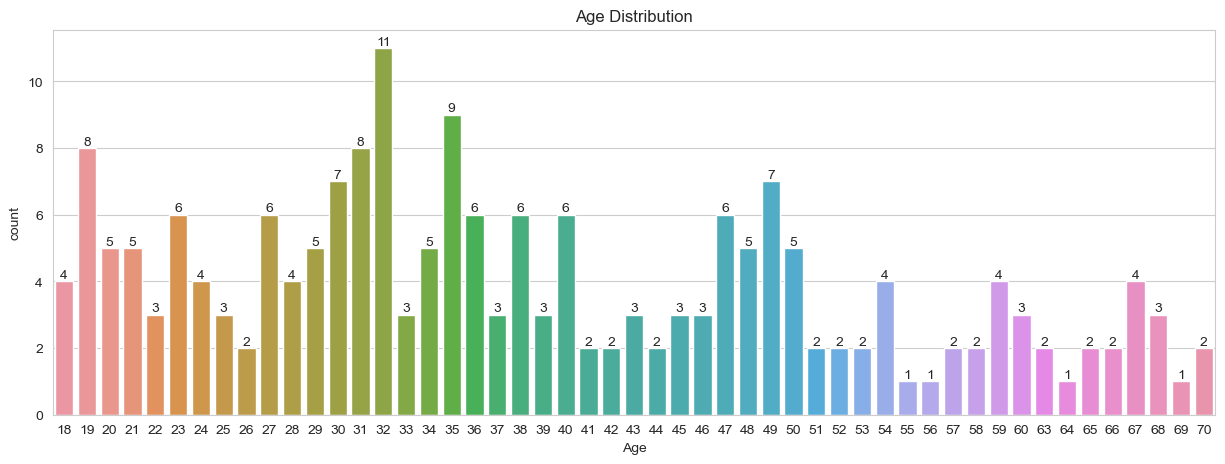

In [11]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x ='Age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0]);

# müşteri grubunun yaş aralığını araştırıyoruz.

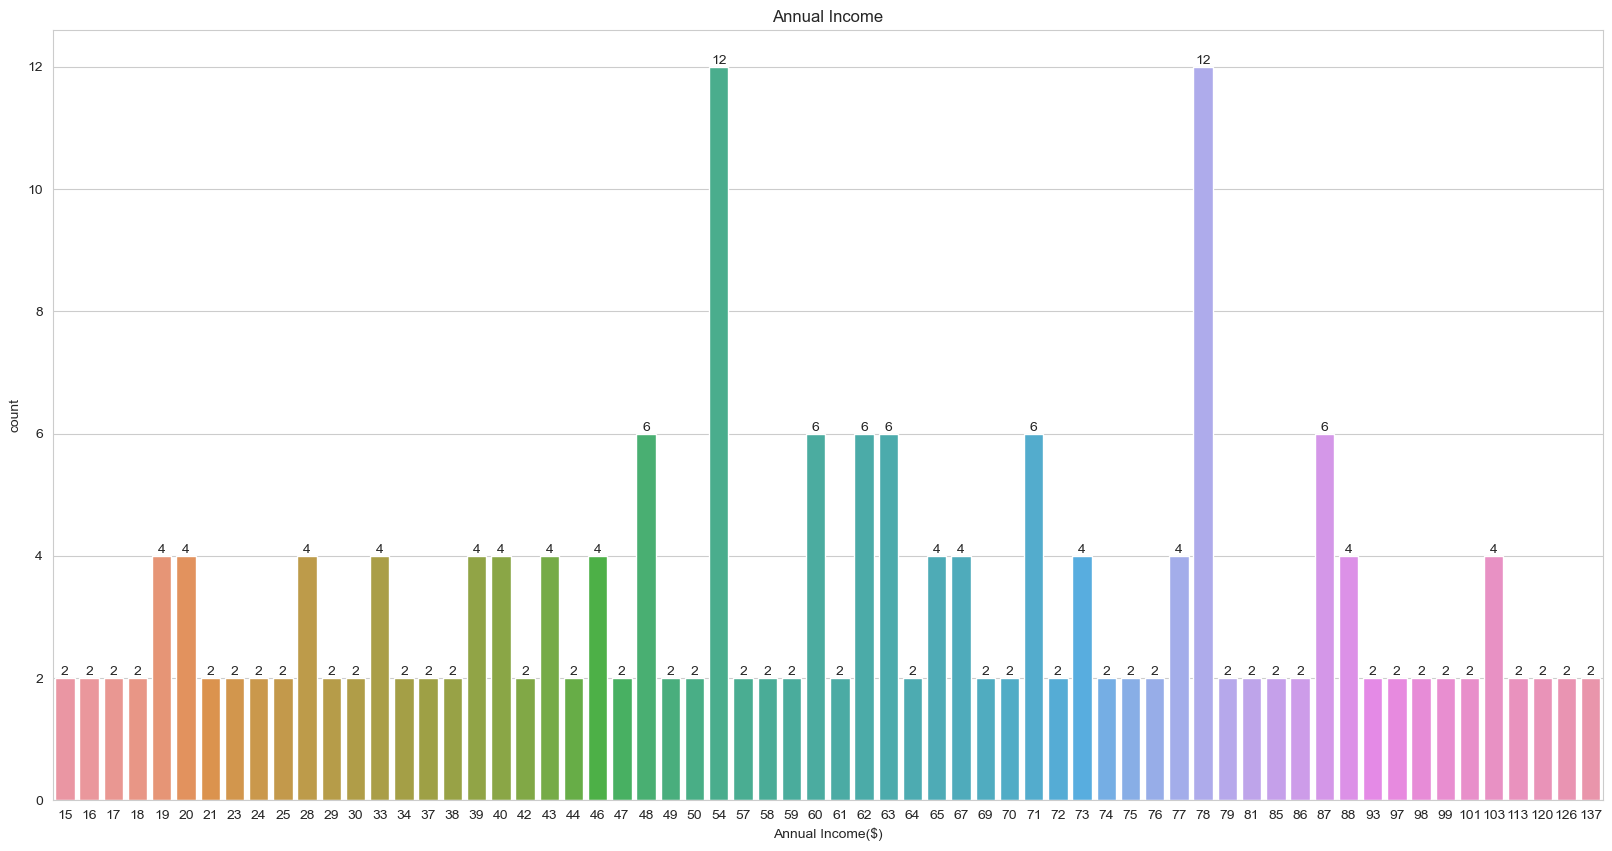

In [12]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Annual_Income', data=df)
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
ax.bar_label(ax.containers[0]);

# müşteri grubunun yıllık gelirlerini  araştırıyoruz.

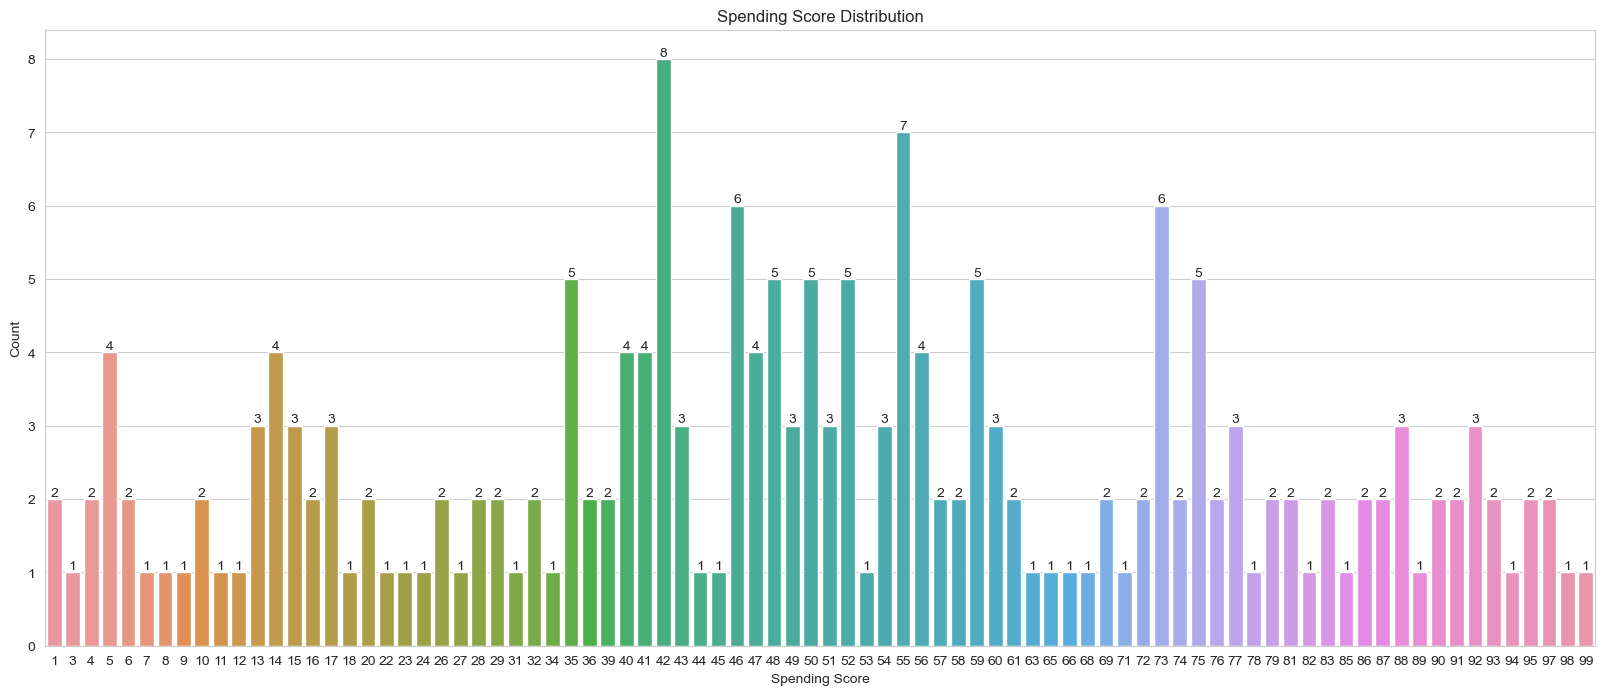

In [13]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Spending_Score', data=df)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

# müşteri grubunun harcama skorlarını  araştırıyoruz.

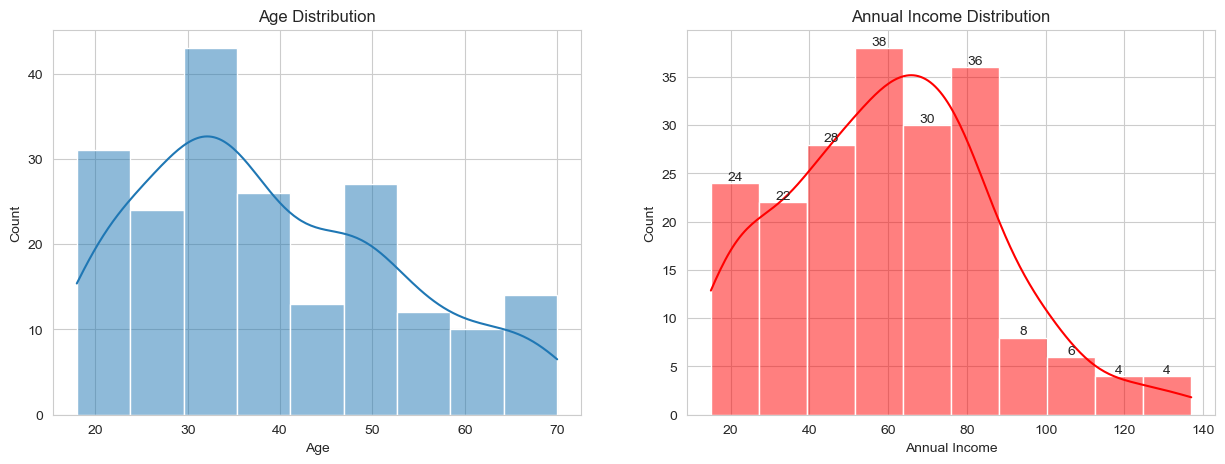

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = sns.histplot(x ='Annual_Income', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

# age ve annual income feature'larının yoğunluklarına bakıyoruz.

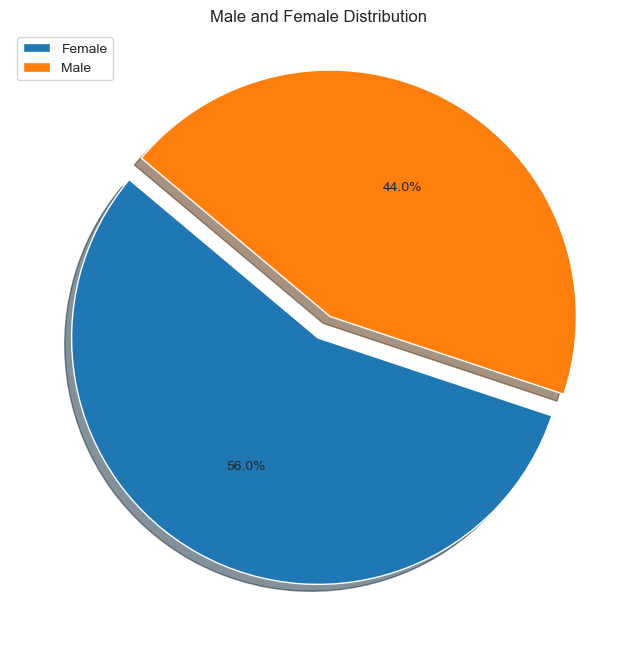

In [15]:
plt.figure(figsize=(8,8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off');
# customer segmantation'da önemli hususlardan biri olan cinsiyet oranlarını karşılaştırıyoruz.

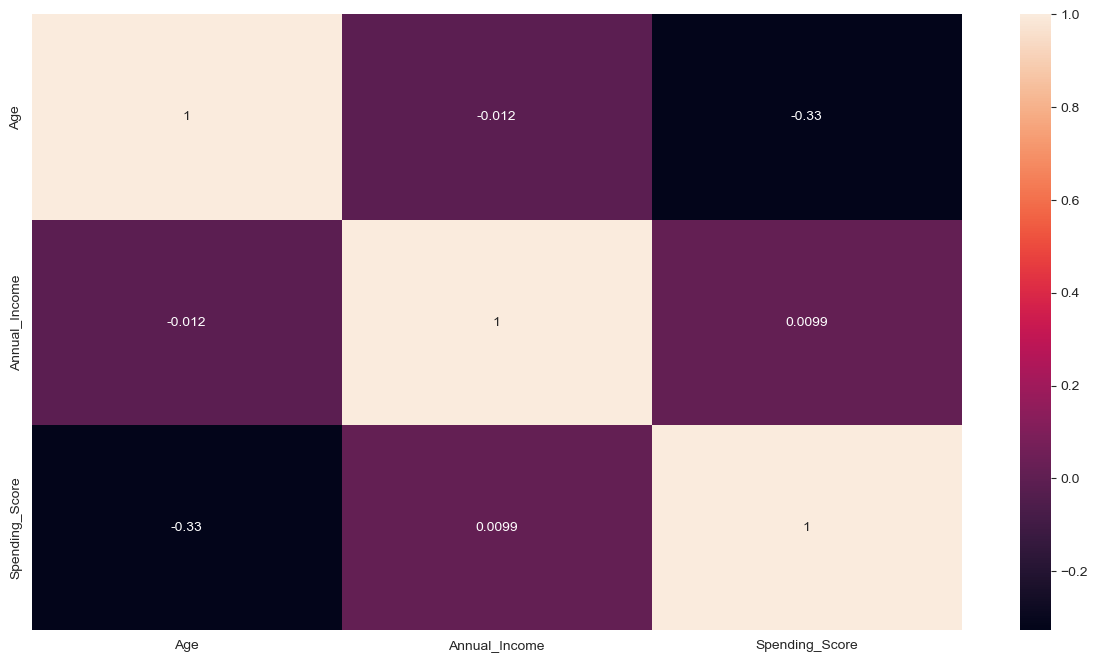

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

# feature'lar arası korelasyona bakıyoruz.

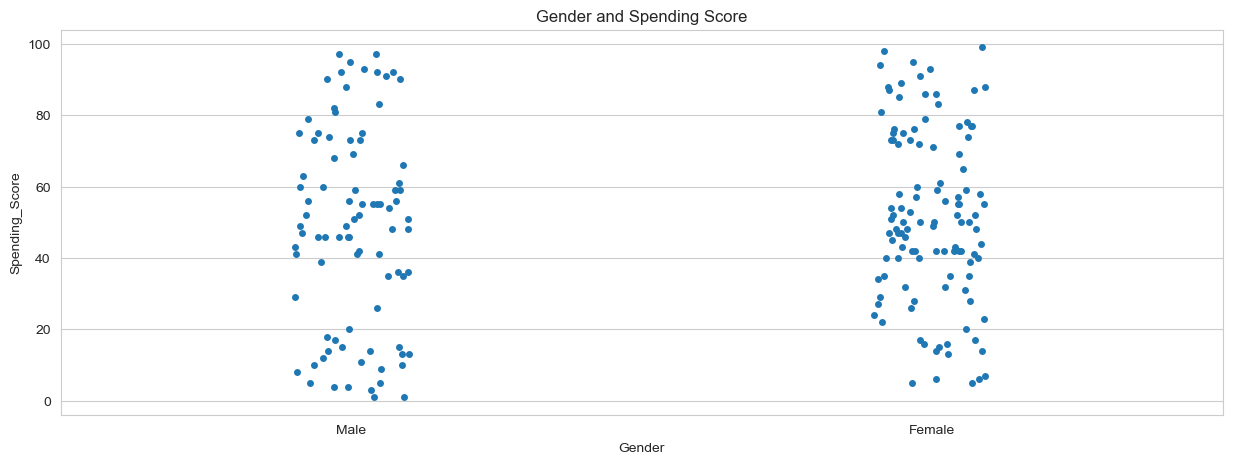

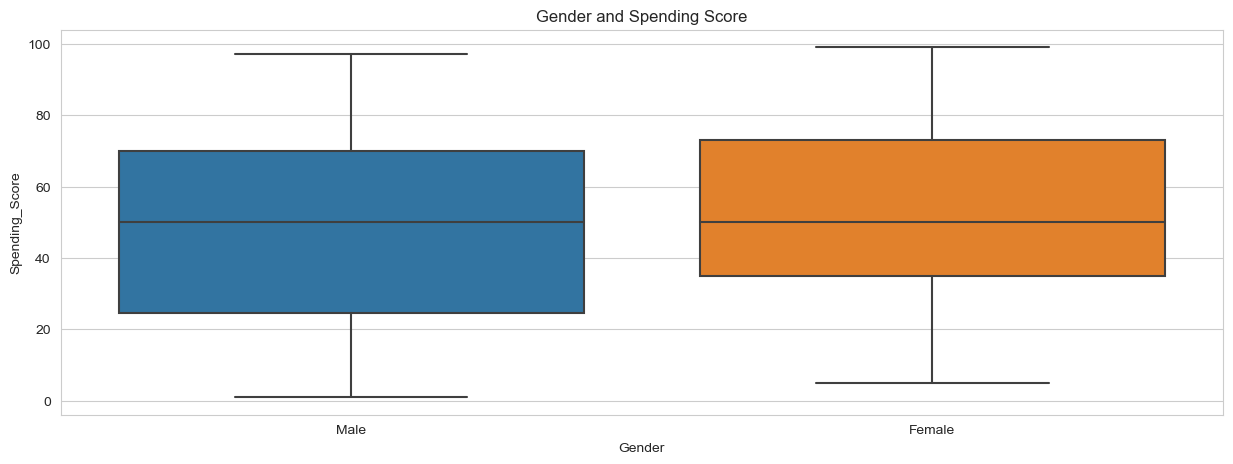

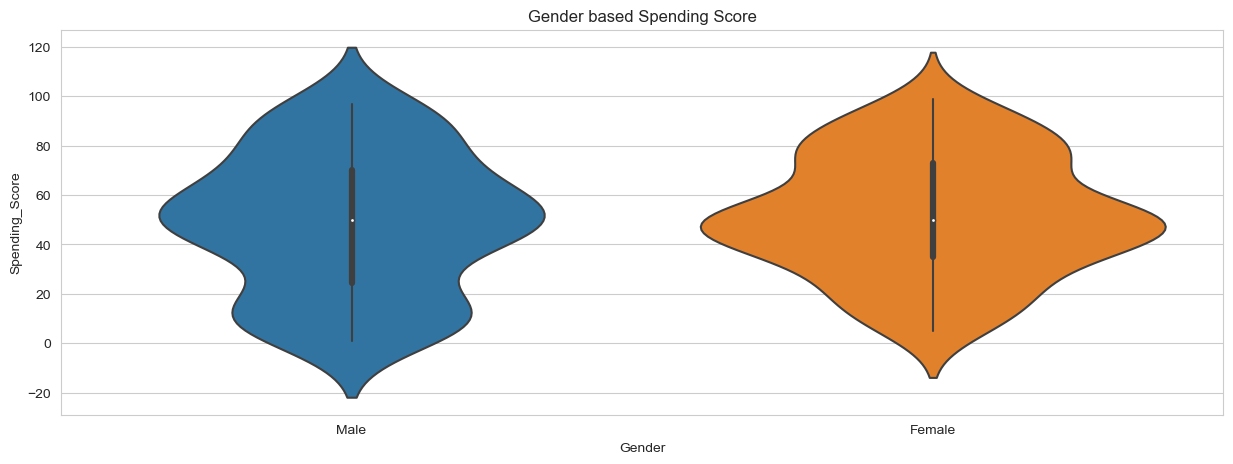

In [17]:
plt.figure(figsize=(15,5))
sns.stripplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

# stripplot : kategorik verilerin yoğunluğuna bakmak için kullanılır.

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender based Spending Score')
plt.show()

# violinplot ile boxplot'ta göremediğimiz yoğunluk durumunu görebiliriz.

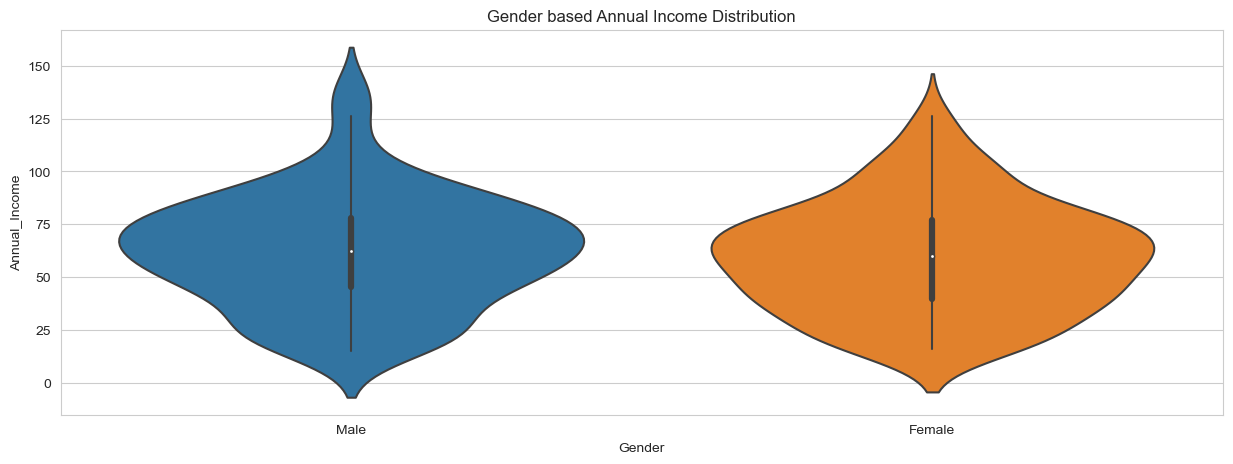

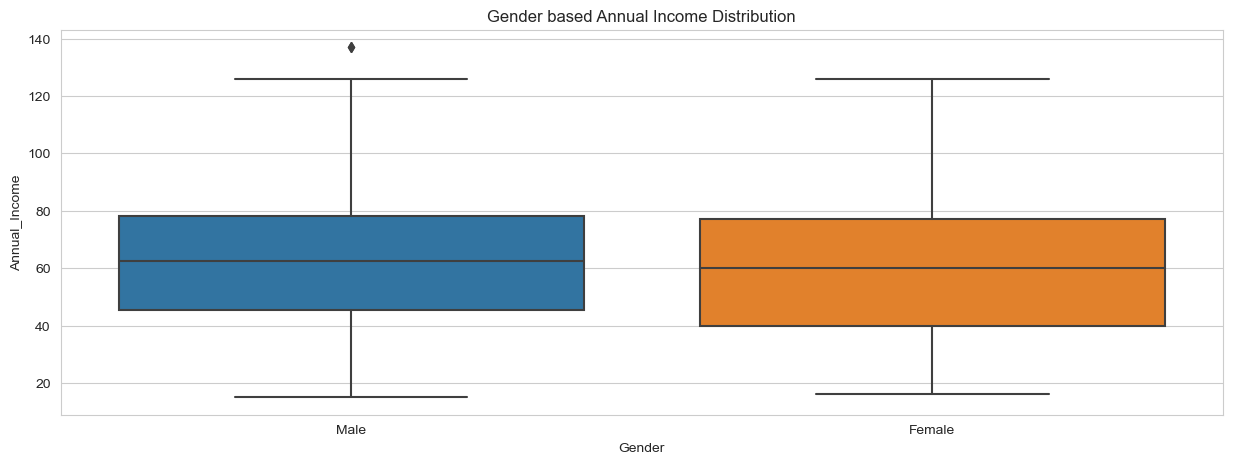

In [18]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

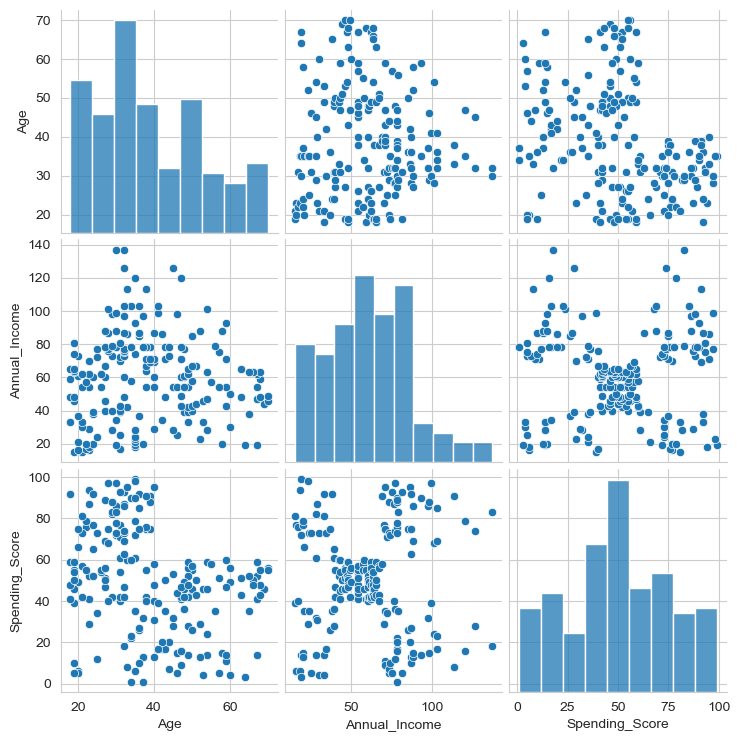

In [19]:
sns.pairplot(df);

# hangi değişkenleri kullanırsak kaç cluster oluşturabiliriz diye bir fikir edinmek için pairplot'a bakıyoruz

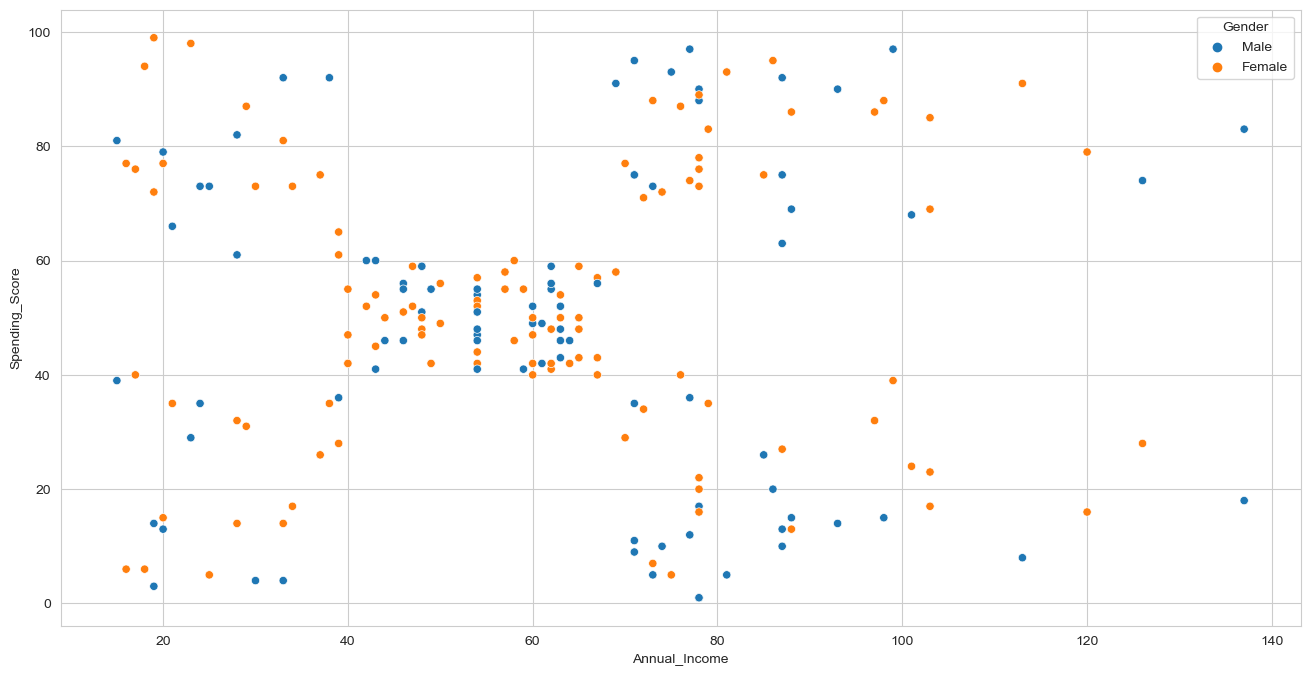

In [20]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ='Annual_Income', y='Spending_Score', data=df, hue = "Gender")
plt.show()
# yukarıda gözümüze çarpan Annual_Income ile Spending_Score'ı kullanarak oluşturacağımız clustering'te 
# gender'ın dağılımına bakıyoruz.

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our features are in the same/similar range, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You should try data both with and without scale and continue with whichever one has good results.

### Clustering based on Age and Spending Score 

#### *i. Create a new dataset with two variables of your choice*

In [21]:
df_2 = df.drop(columns="Gender")
df_2
# k-means algoritmalarında kategorik feature'ları kullanmıyoruz.

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [22]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# normalde bu fonksiyonumuz  pyclustertend'ın hopkins kütüphanesinde var.Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız . Bundan dolayı pyclustertend'ı install etmemize gerek yoktur! 
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [23]:
hopkins(df_2, df_2.shape[0])

# hopkins test ile data uniform mu dağılıyor random mı  dağılıyor bize onunla ilgili bir sonuç döndürür.
# 0'a ne kadar yakınsa datam clusteringe o kadar yatkındır deriz .

0.31810412170832886

In [24]:
X_age_ss = df.loc[:,['Age','Spending_Score']]
X_age_ss

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [25]:
hopkins(X_age_ss, X_age_ss.shape[0])

0.31231295102638496

#### *ii. Determine optimal number of clusters*

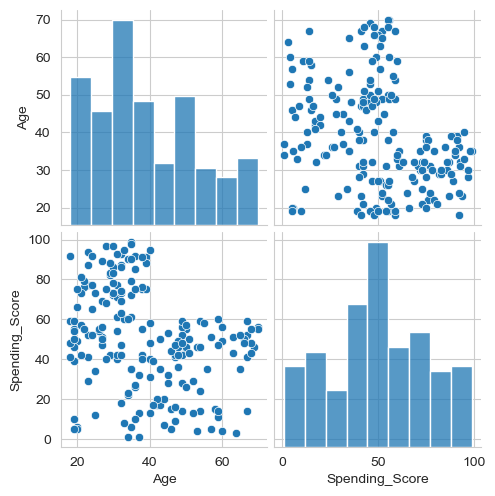

In [26]:
sns.pairplot(X_age_ss);
# age ve spending score'un dağılımlarına bakıyoruz.

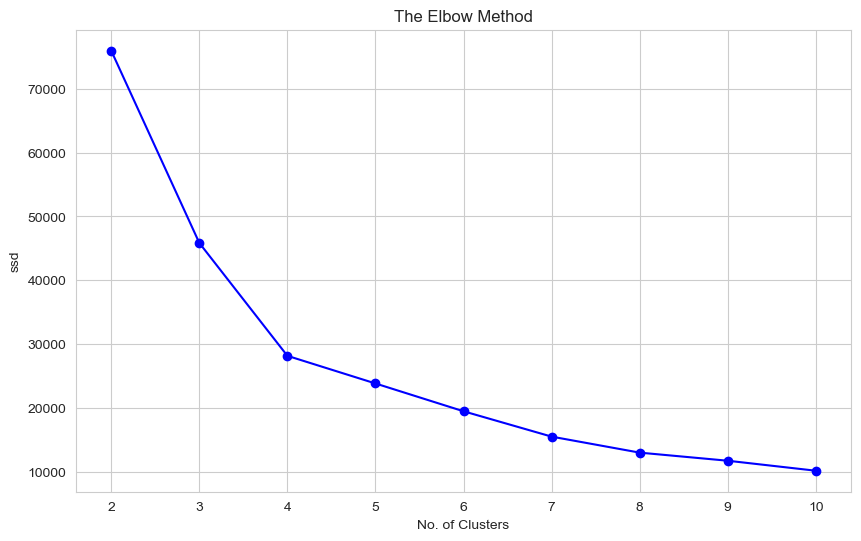

In [27]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(X_age_ss)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [28]:
ssd

[75949.15601023017,
 45840.67661610868,
 28165.583566629342,
 23838.24882164619,
 19483.1179104427,
 15514.193134351031,
 13006.483628851023,
 11738.020296954506,
 10173.039478114479]

In [29]:
pd.Series(ssd).diff()

0             NaN
1   -30108.479394
2   -17675.093049
3    -4327.334745
4    -4355.130911
5    -3968.924776
6    -2507.709506
7    -1268.463332
8    -1564.980819
dtype: float64

In [30]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.479394
3,17675.093049
4,4327.334745
5,4355.130911
6,3968.924776
7,2507.709506
8,1268.463332
9,1564.980819


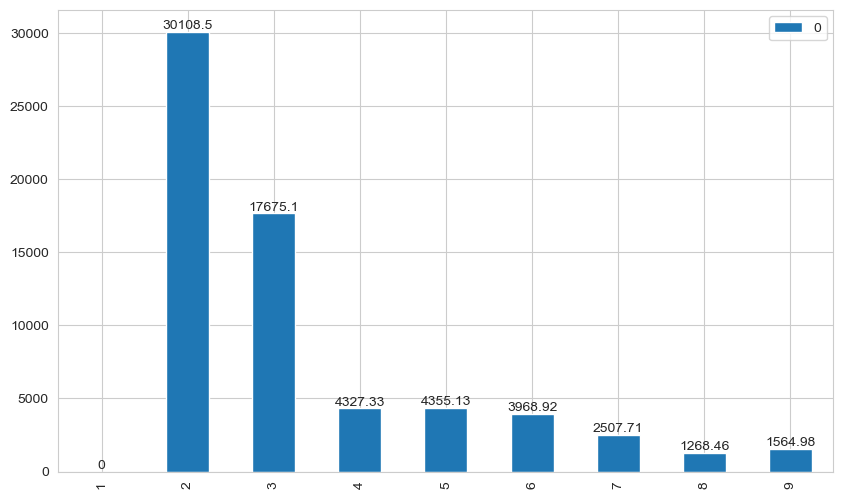

In [31]:
ax = df_diff.plot(kind='bar', figsize=(10,6))
ax.bar_label(ax.containers[0]);

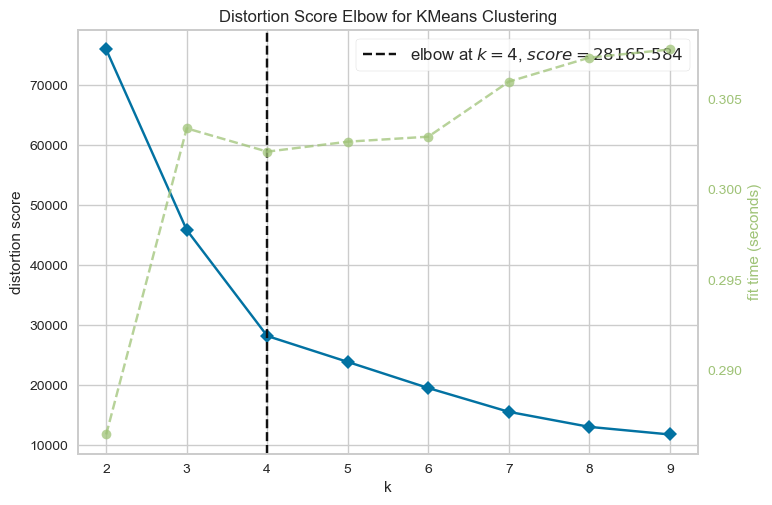

In [32]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X_age_ss)
visu.poof();

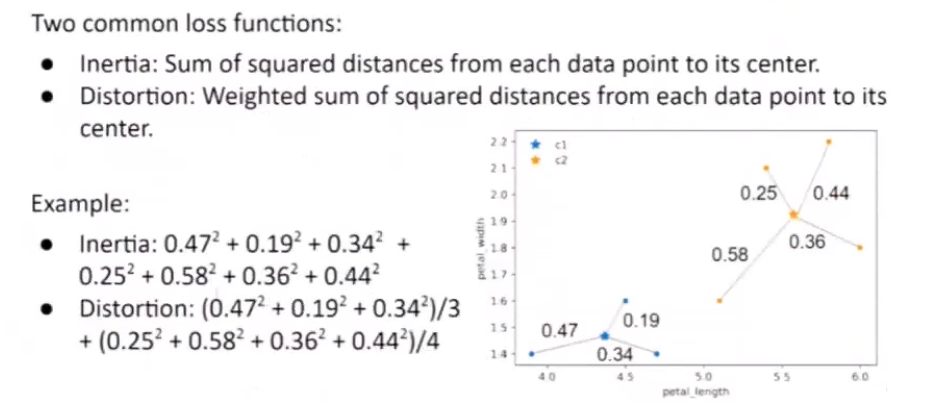

In [33]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_age_ss)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_age_ss, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


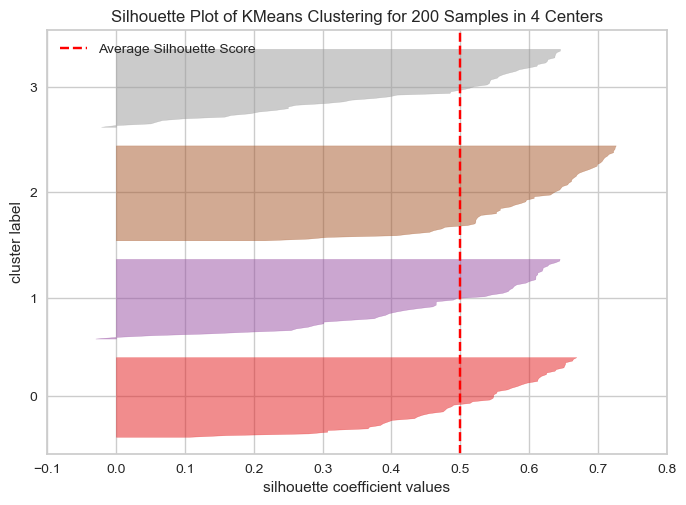

In [34]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_age_ss)    # Fit the data to the visualizer
visualizer.poof();

In [35]:
model3.n_clusters
# .n_clusters ile kaç cluster sayısını alabiliriz.

4

In [36]:
#model3.n_clusters

for i in range(model3.n_clusters):
    label = (model3.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.45429047261675404
mean silhouette score for label 2    : 0.5960779476836082
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


### Why silhouette_score is negative?

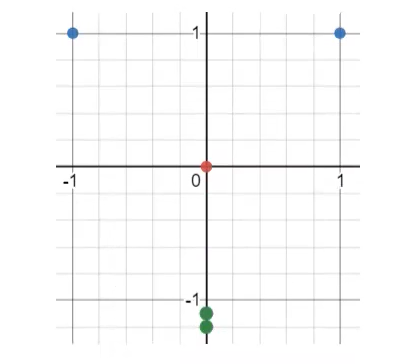

https://stackoverflow.com/questions/63639841/how-can-silhouette-scores-be-negative

#### *iii. Apply K Means*

In [37]:
kmeans = KMeans(n_clusters = 4, random_state=42)

# age ve spending score'a göre 4 cluster'a karar verdiğimiz için n_clusters = 4.

In [38]:
kmeans.fit_predict(X_age_ss)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [39]:
df_age_ss = X_age_ss.copy()
df_age_ss

# aşağıda Hierarchical Clustering ile de bir kümeleme işlemi yapıp karşılaştıracağımız için copy işlemini yapıyoruz.

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [40]:
df_age_ss["cluster_Kmeans"] = kmeans.fit_predict(X_age_ss) #kmeans.labels_

# cluster_Kmeans'i df_age_ss'e bir column olarak ekliyoruz.

In [41]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


#### *iv. Visualizing and Labeling All the Clusters*

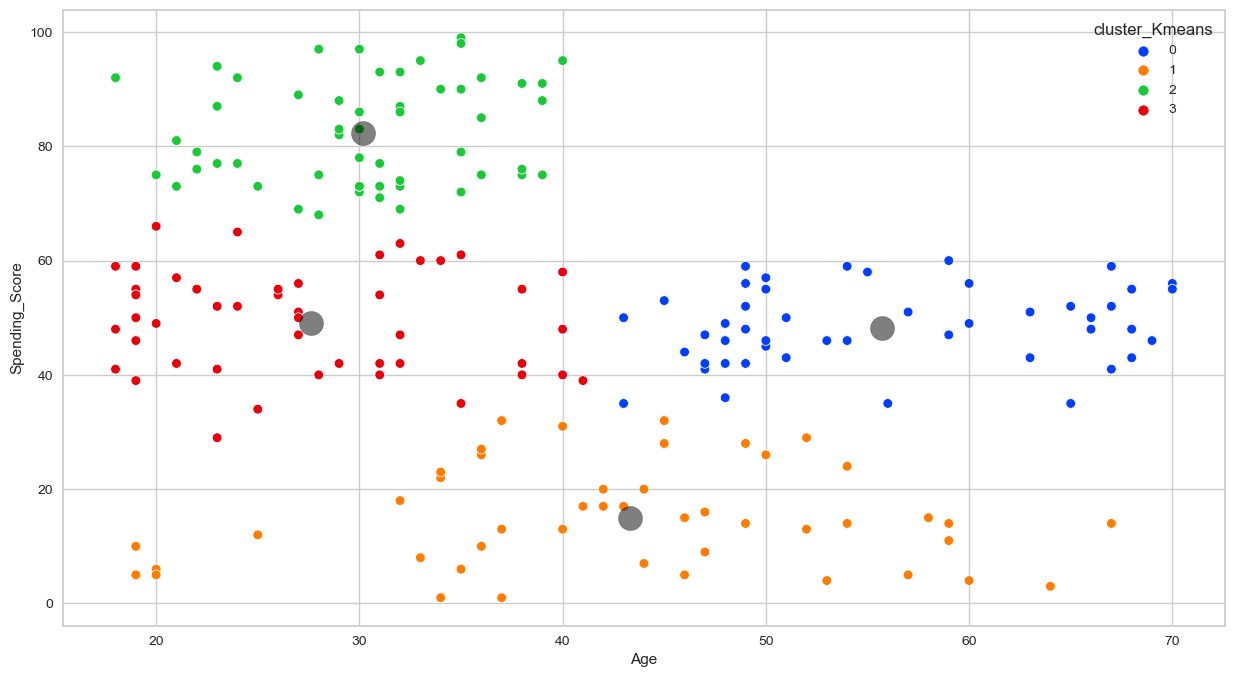

In [42]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=df_age_ss, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);
# age'e ve spending score göre oluşan clusterlara ve centroidlerine bakıyoruz.

In [43]:
# insanlar belli yaş dönemlerinde belli alışveriş davarnışları gösterir.O yüzden cluster_0 ve cluster_3'e 
# uygulayacağımız kampanyalar aynı olmaz.

### Clustering based on Annual Income and Spending Score 

#### *i. Create a new dataset with two variables of your choice*

In [44]:
X_ai_ss = df[['Annual_Income','Spending_Score']]
X_ai_ss.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [45]:
hopkins(X_ai_ss, X_ai_ss.shape[0])

0.2935470826176522

#### *ii. Determine optimal number of clusters*

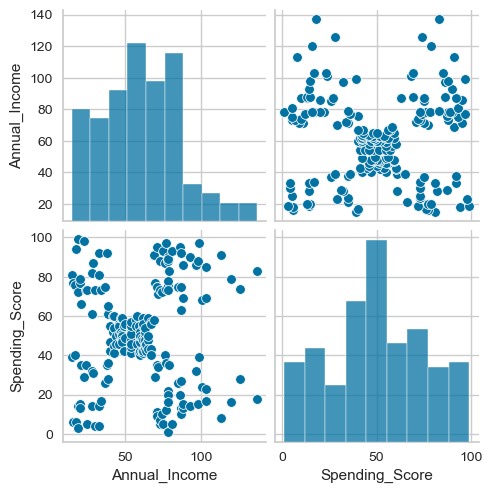

In [46]:
sns.pairplot(X_ai_ss);
# Annual_Income ve Spending_Score'un dağılımlarına bakıyoruz.

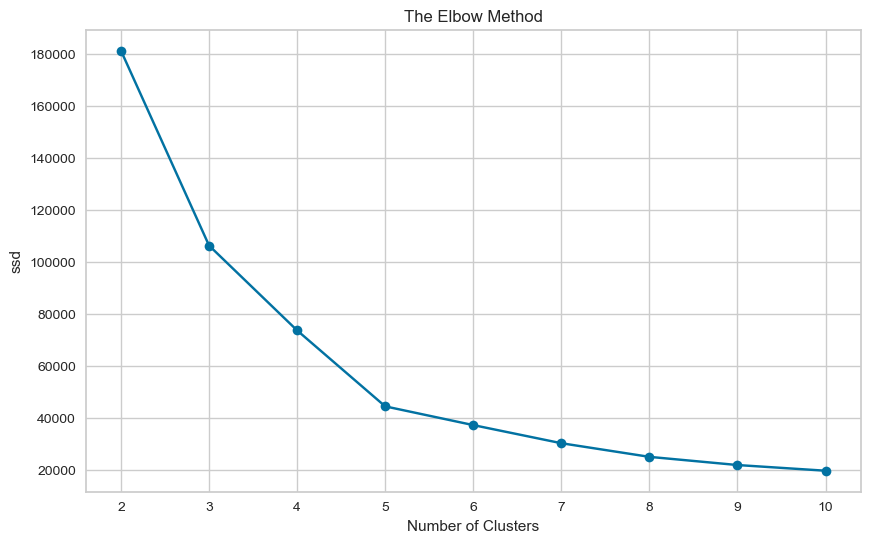

In [47]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_ai_ss)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()

In [48]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,75015.222897
3,32668.584023
4,29231.333592
5,7214.640937
6,6974.157303
7,5247.817858
8,3149.746677
9,2190.019823


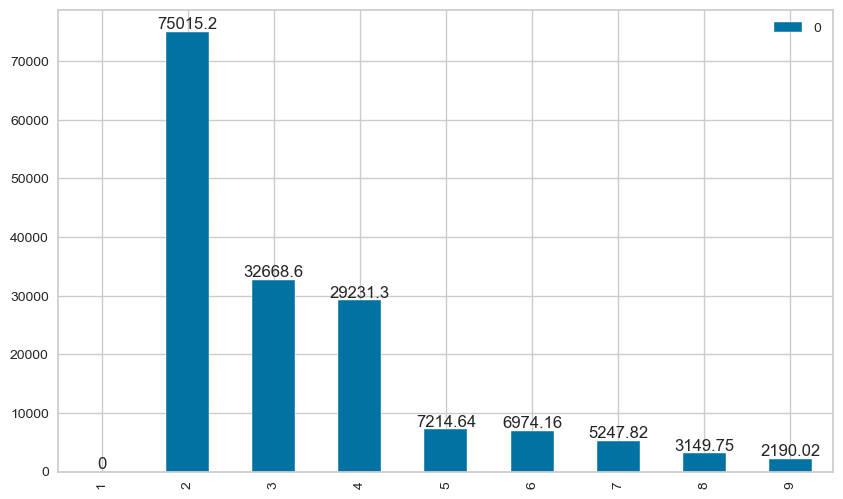

In [49]:
ax = df_diff.plot(kind='bar', figsize=(10,6))
ax.bar_label(ax.containers[0]);

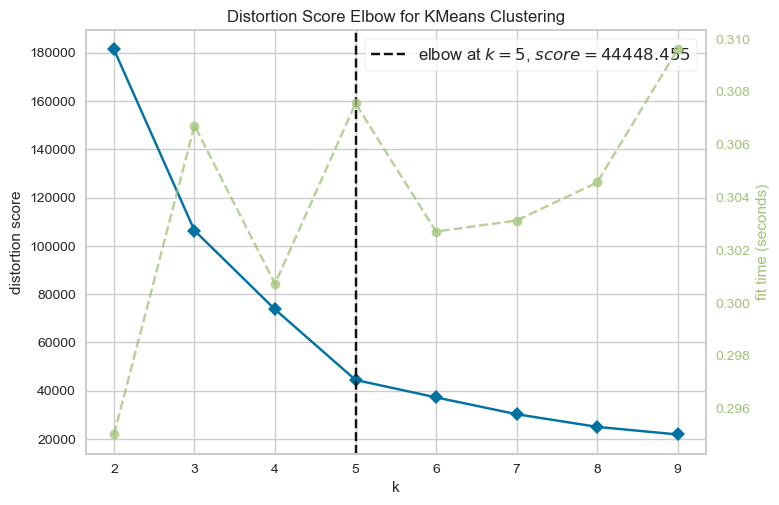

In [50]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X_ai_ss)
visu.poof();

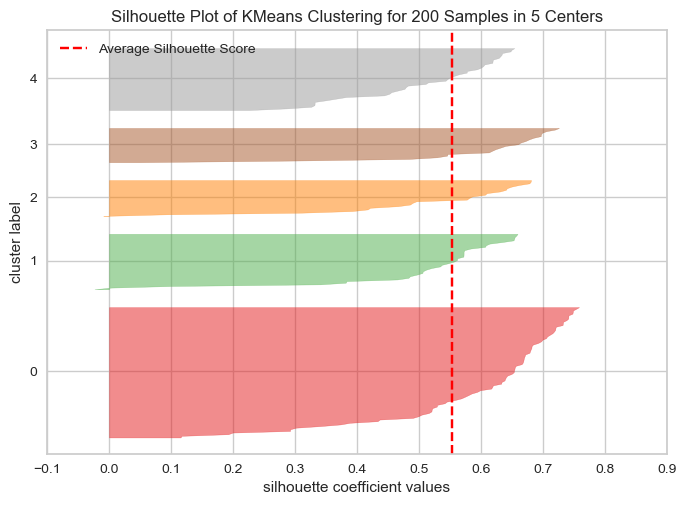

In [51]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X_ai_ss)    # Fit the data to the visualizer
visualizer.poof();

In [52]:
## cluster 0 'ın sample sayısı diğer clusterlara göre fazla 

In [53]:
#model3.n_clusters

for i in range(model4.n_clusters):
    label = (model4.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5966512190217801
mean silhouette score for label 1    : 0.5039873487056818
mean silhouette score for label 2    : 0.5122676140736505
mean silhouette score for label 3    : 0.5990128687006722
mean silhouette score for label 4    : 0.5091706489322517
mean silhouette score for all labels : 0.553931997444648


In [54]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_ai_ss)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_ai_ss, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4553729779390266
For n_clusters=10, the silhouette score is 0.45925273534781125


#### *iii. Apply K Means*

In [55]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(X_ai_ss)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [56]:
df_ai_ss = X_ai_ss.copy()
df_ai_ss.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [57]:
df_ai_ss['cluster_Kmeans'] = kmeans2.fit_predict(X_ai_ss) #kmeans2.labels_
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

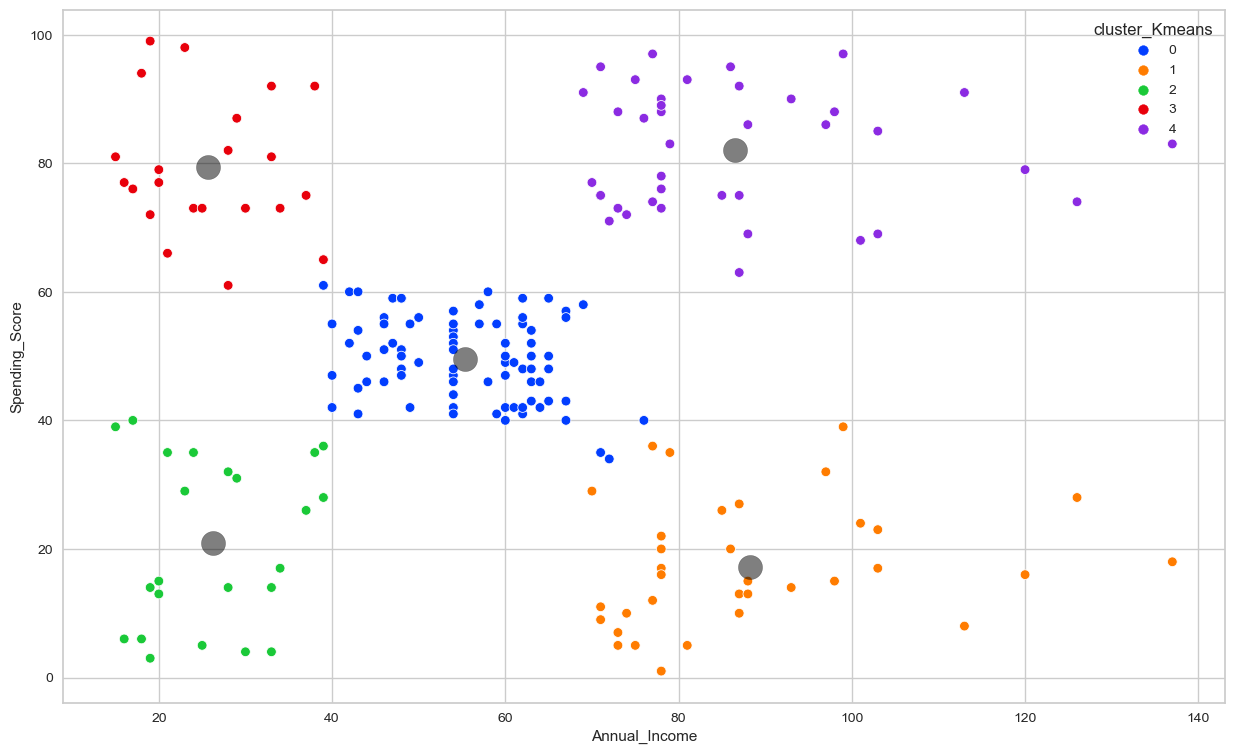

In [58]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Kmeans', data=df_ai_ss, palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

# Annual_Income ve Spending_Score göre oluşan clusterlara ve centroidlerine bakıyoruz.

#### Biz şu ana kadar Kmeans algoritması üzerinden çıkarımlarımızı yaptık diğer bir clustering algoritması olan Hierarchical Clustering ile de sonuçları alacağız ve karşılaştıracağız : 


### Dikkat etmemiz gereken husus kmeans'teki cluster sayılarımızı göz önünde bulundurcağız ki farklılıkları bulalım.

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendrogram*

### Clustering based on Age and Spending Score

In [59]:
X_age_ss

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [60]:
from scipy.cluster.hierarchy import linkage

# dendrogram çizdirebilmek için datayı doğrudan vermemiz yetmez linkage'ı kullanmak zorundayız.

In [61]:
hc_ward = linkage(y = X_age_ss, method = "ward")                        
hc_complete = linkage(X_age_ss, "complete")
hc_average = linkage(X_age_ss, "average")
hc_single = linkage(X_age_ss, "single")

In [62]:
from scipy.cluster.hierarchy import dendrogram

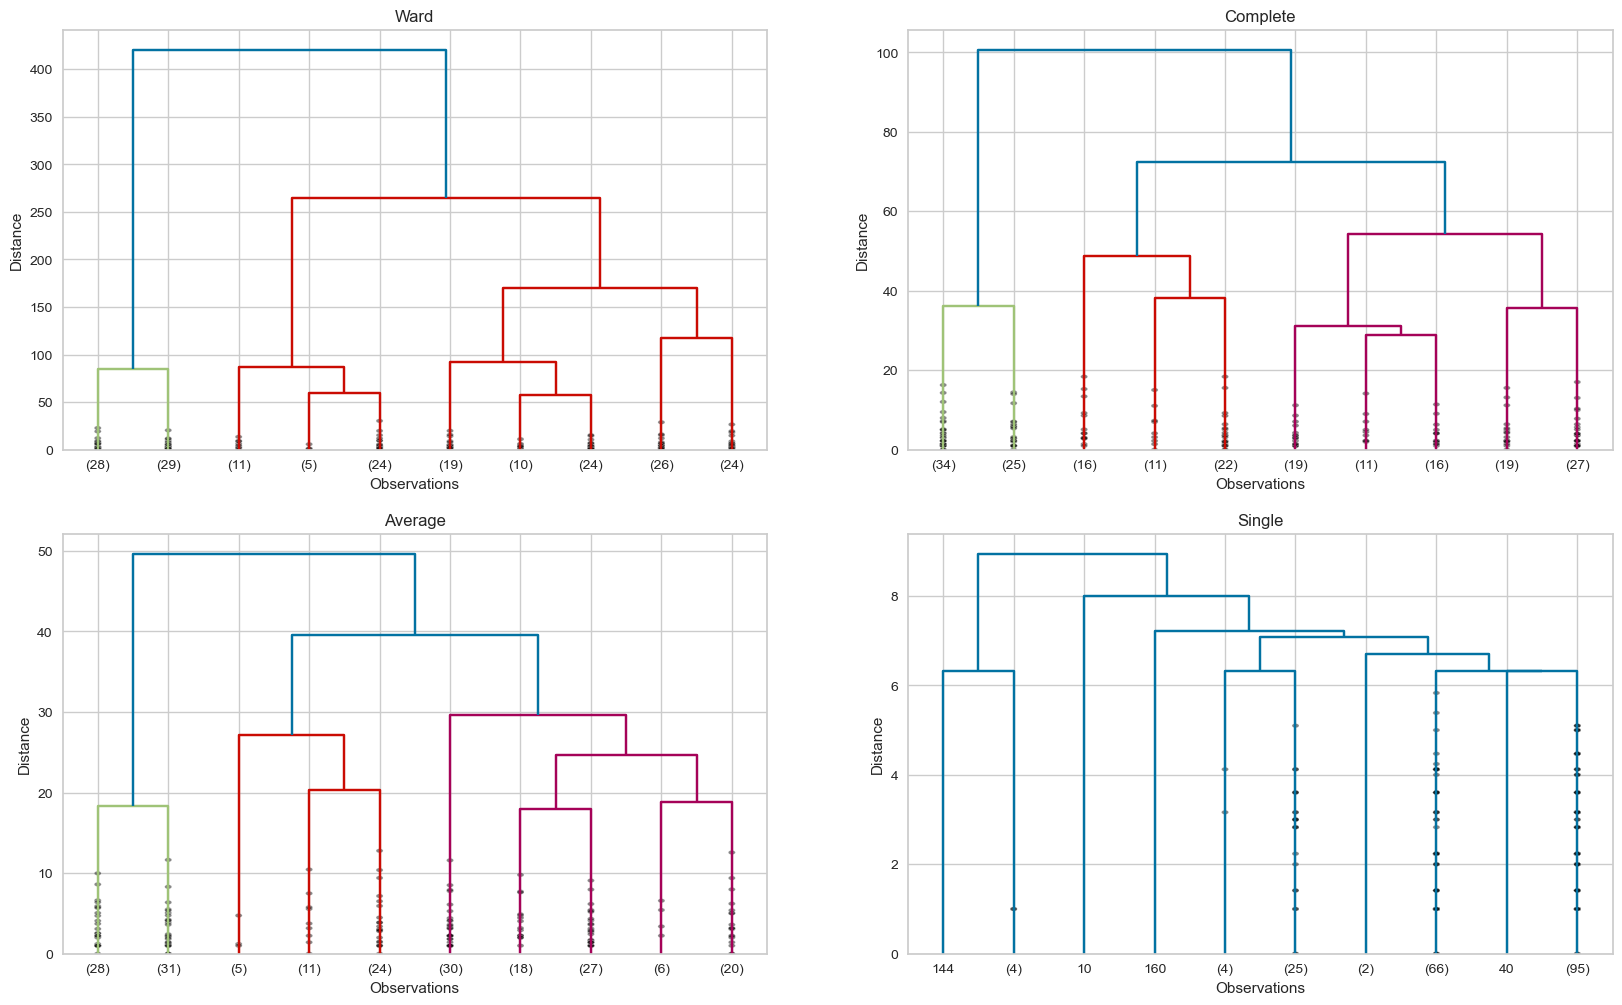

In [63]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [64]:
## skalalara dikkat edelim.

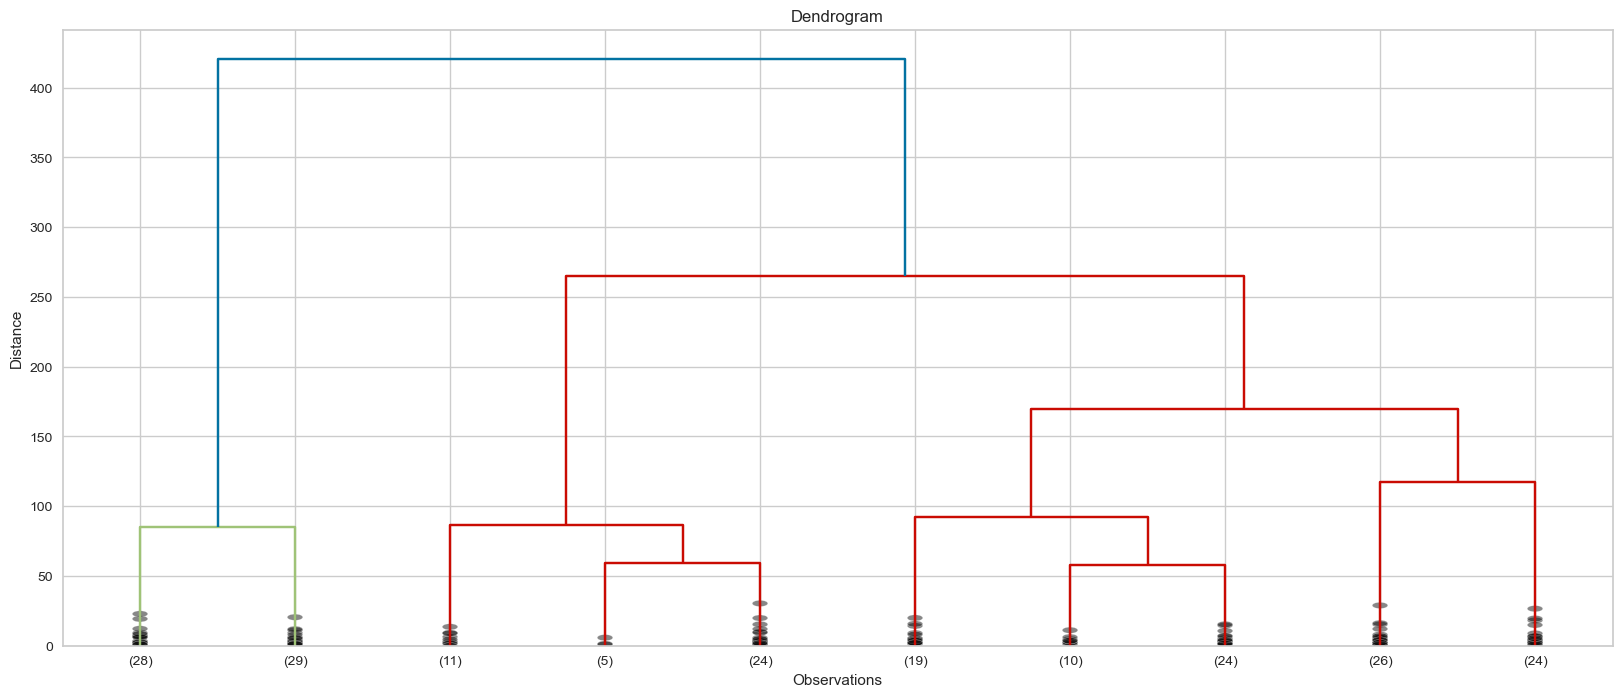

In [65]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [66]:
# bize 2 cluster tavsiye etmiş ama kümeler arası mesafeleri dikkate alarak 2 tavsiye ediyor . O yüzden  ;
# silhouette_score'lara bakarak da bir tavsiye alalım :

In [67]:
from sklearn.cluster import AgglomerativeClustering

In [68]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_age_ss)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_age_ss, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


## Clustering based on Annual Income and Spending Score

In [69]:
X_ai_ss

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [70]:
hc_ward = linkage(y = X_ai_ss, method = "ward")
hc_complete = linkage(X_ai_ss, "complete")
hc_average = linkage(X_ai_ss, "average")
hc_single = linkage(X_ai_ss, "single")

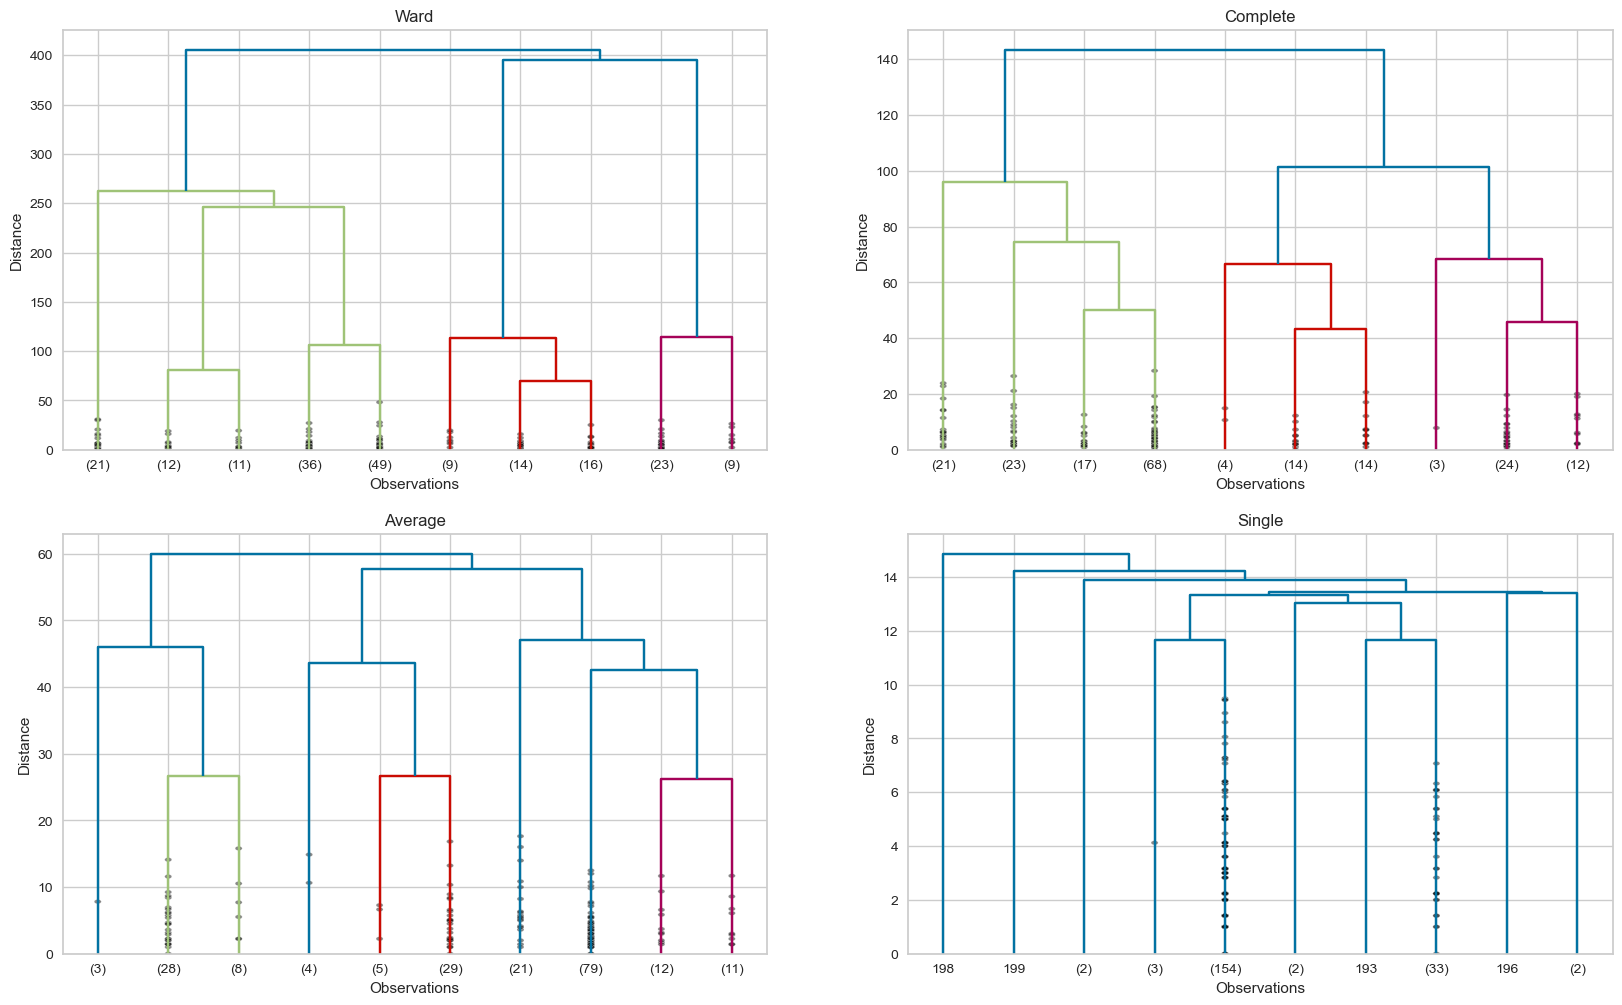

In [71]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

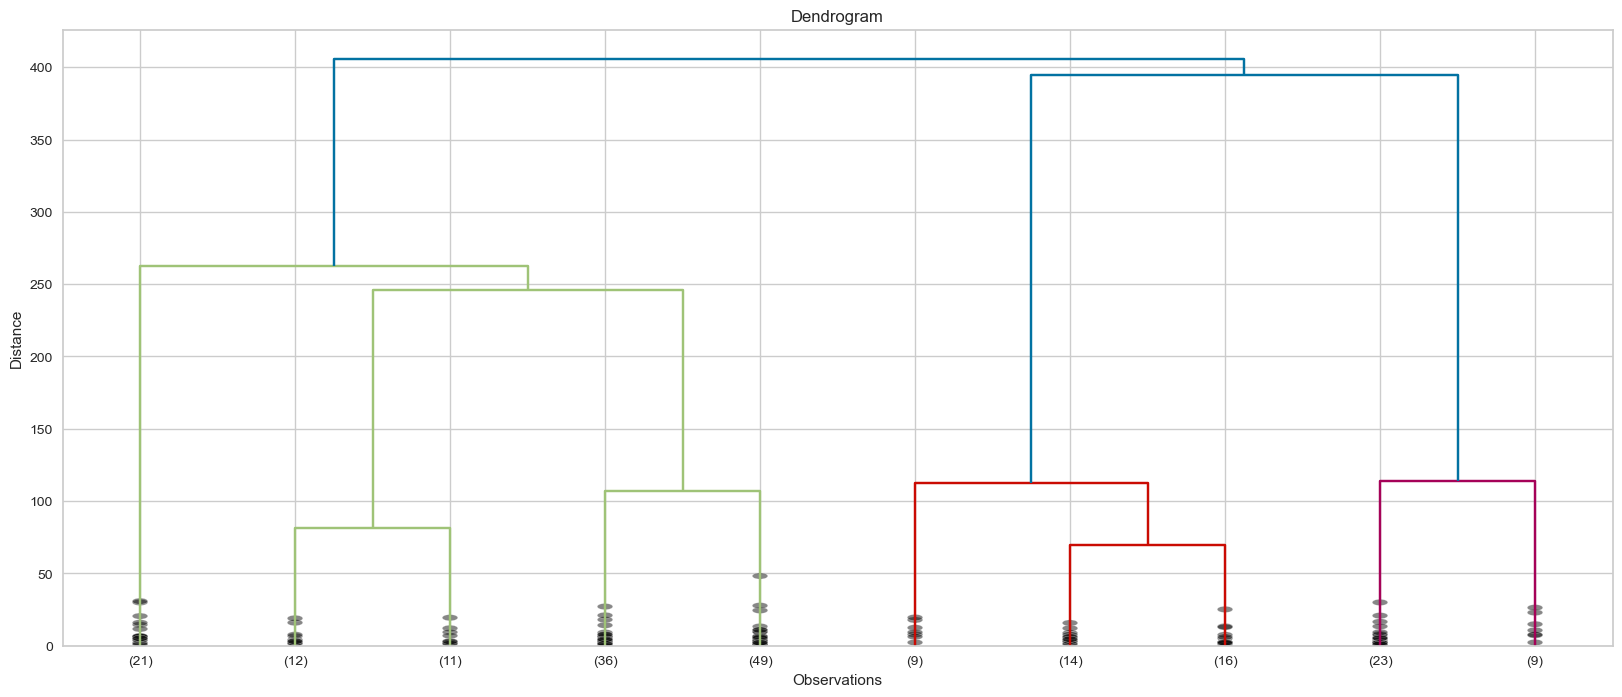

In [72]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [73]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_ai_ss)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_ai_ss, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507
For n_clusters=10, the silhouette score is 0.4342656377895271


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score

In [74]:
X_age_ss

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [75]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(X_age_ss)                # linkage = "ward" ise affinity='euclidean' zorunludur.
                                                 # varyansın formülasyonundan kaynaklı...

In [76]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


In [77]:
df_age_ss['cluster_Agg'] = y_agg
df_age_ss.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


#### Annual Income and Spending Score

In [78]:
X_ai_ss

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [79]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(X_ai_ss)

In [80]:
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


In [81]:
df_ai_ss['cluster_Agg'] = y_agg2
df_ai_ss.head()

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


In [82]:
# labellar farklı ama yerleri hemen hemen aynı (cluster_Kmeans - cluster_Agg)

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score

In [83]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,1,2


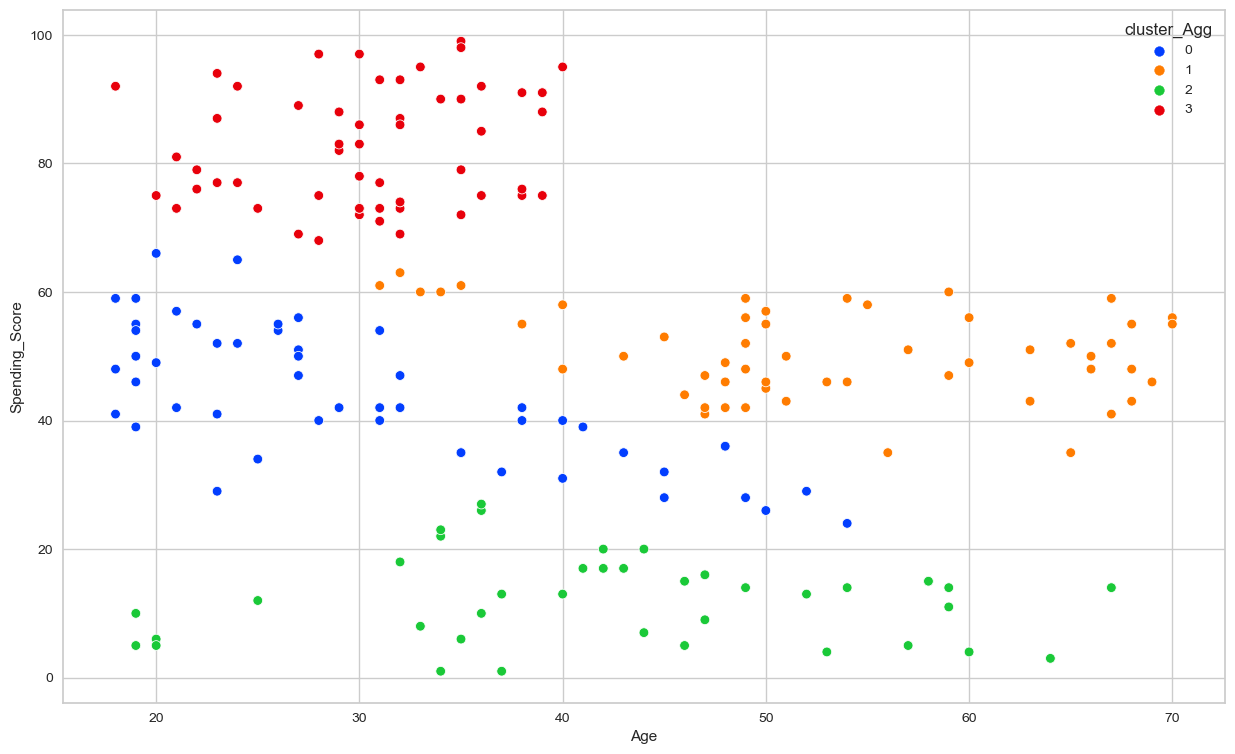

In [84]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=df_age_ss, palette="bright");

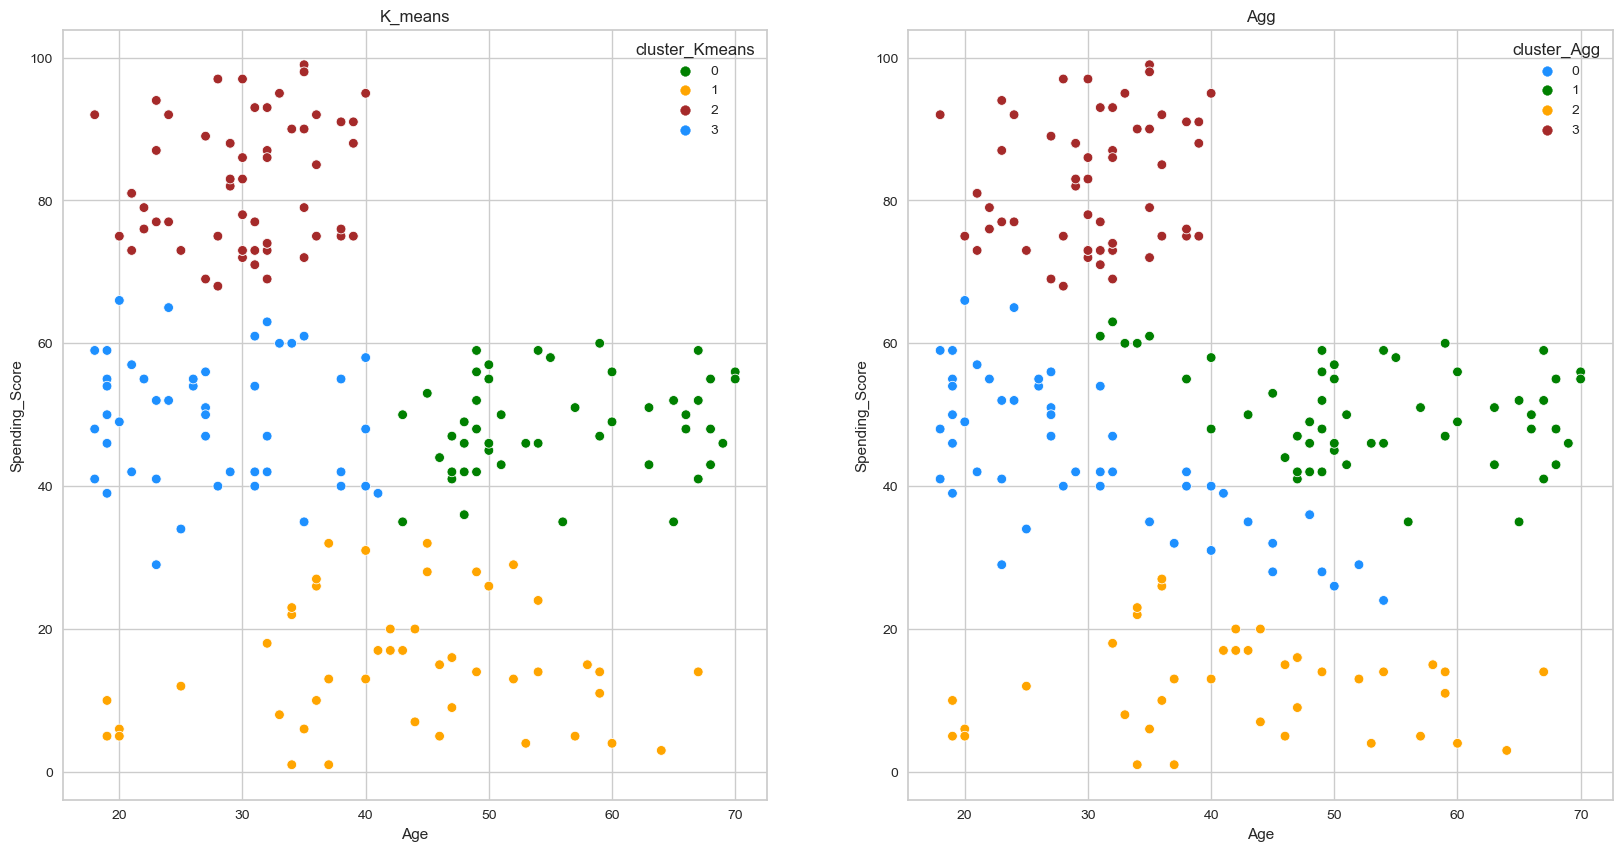

In [85]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=df_age_ss, palette=['green','orange','brown',
                                                                             'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=df_age_ss, palette=['dodgerblue','green',
                                                                              'orange','brown'])
plt.title("Agg");

In [86]:
# küme sınırlarını keskin çizmemiş Hierarchical Clustering buna dikkat etmek lazım . Kmeans daha iyi ayrılmış.

#### Annual Income and Spending Score

In [87]:
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

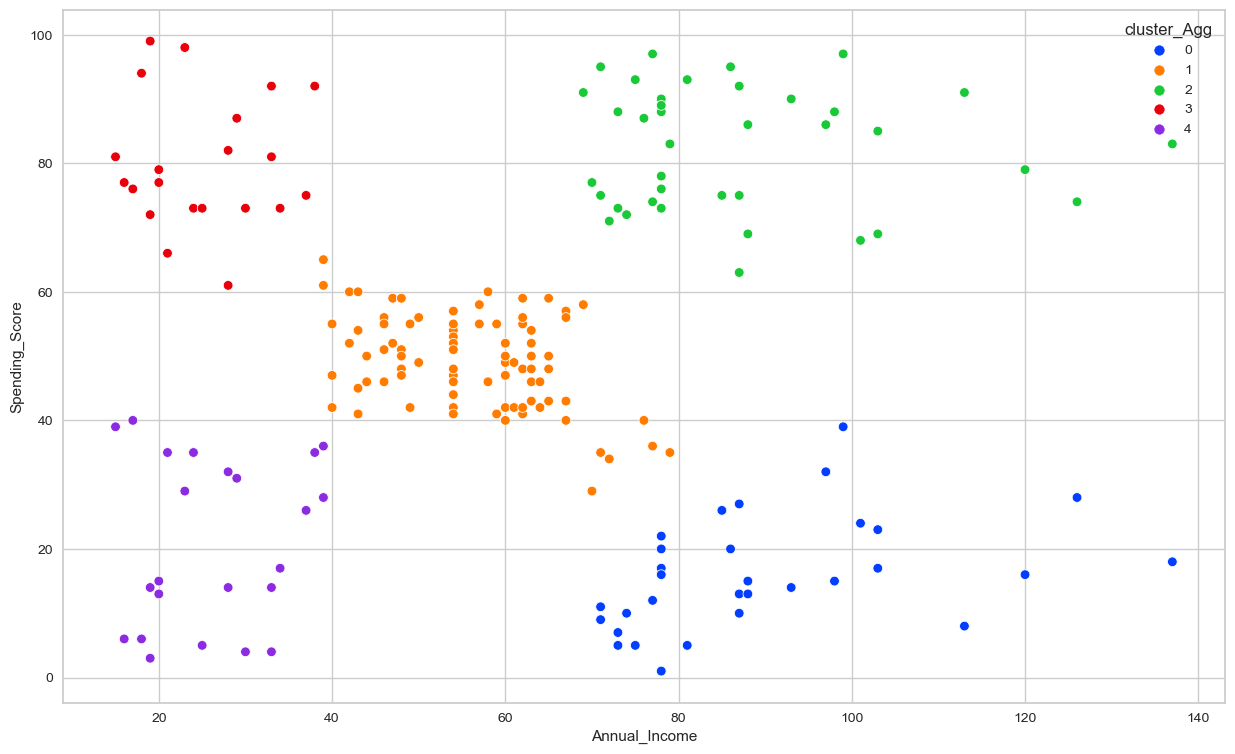

In [88]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=df_ai_ss ,palette="bright")

Text(0.5, 1.0, 'Agg')

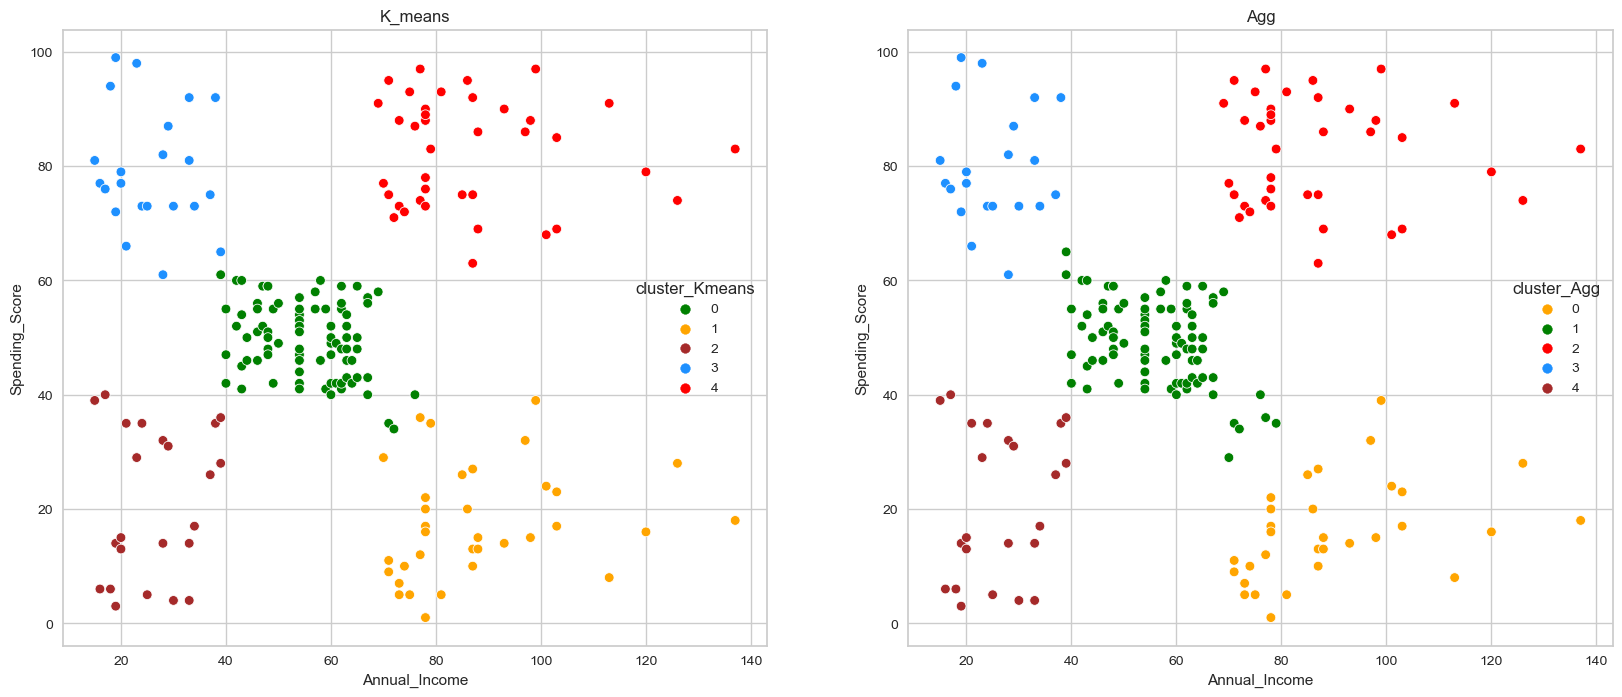

In [89]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Kmeans', data=df_ai_ss, palette=['green', 'orange',
                                                            'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=df_ai_ss, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("Agg")

In [90]:
# Kmeans'te daha sağlıklı geçişler var 
# Kmeans algoritmasını seçtik nihai olarak 

#### Interpretation based on Age and Spending Score

In [91]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,1,2


In [92]:
df_age_ss.cluster_Kmeans.value_counts()

# müşterileri clusterlara göre saydırıyoruz age ve spending score için.

2    57
1    48
0    48
3    47
Name: cluster_Kmeans, dtype: int64

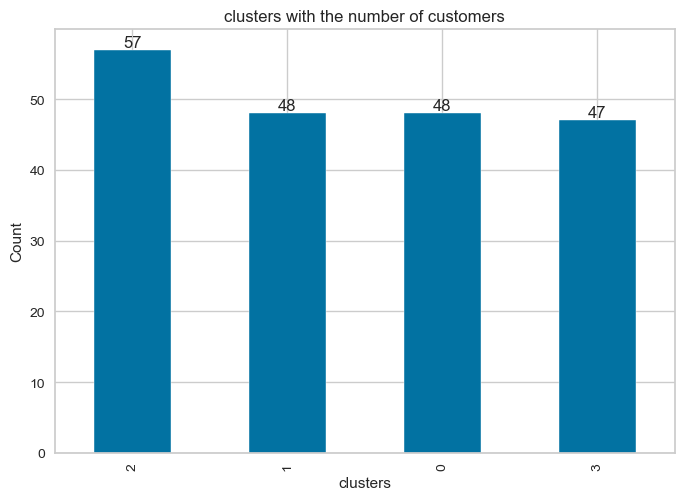

In [93]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_age_ss.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [94]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [95]:
df["cluster_Age_Spending_Score"] = df_age_ss.cluster_Kmeans
df.head()

# df'imize Kmeans sonucu oluşan cluster'ları ekliyoruz (age-spending score)

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


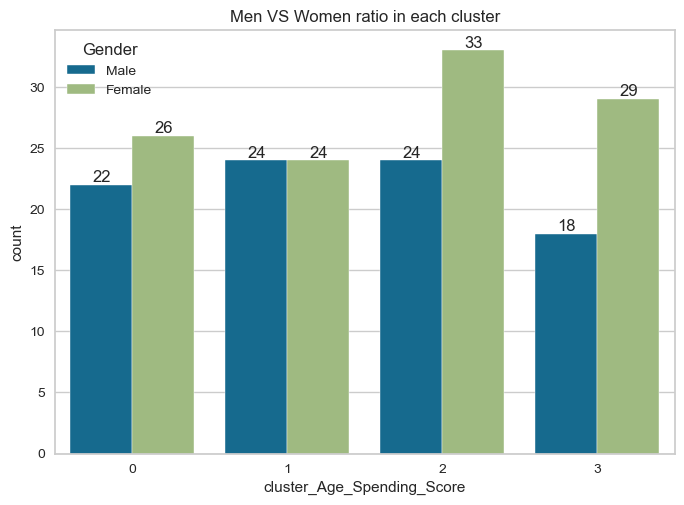

In [96]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)
# clusterları gender'a göre saydırıyoruz.

In [97]:
# 2 ve 3. clusterlarda kadınların fazlalığı dikkat çekiyor.

In [98]:
df.groupby("cluster_Age_Spending_Score").mean()
# oluşan clusterlara göre gruplandırıyoruz.

,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,
0,55.708333,54.770833,48.229167
1,43.291667,66.937500,15.020833
2,30.175439,66.070175,82.350877
3,27.617021,53.276596,49.148936


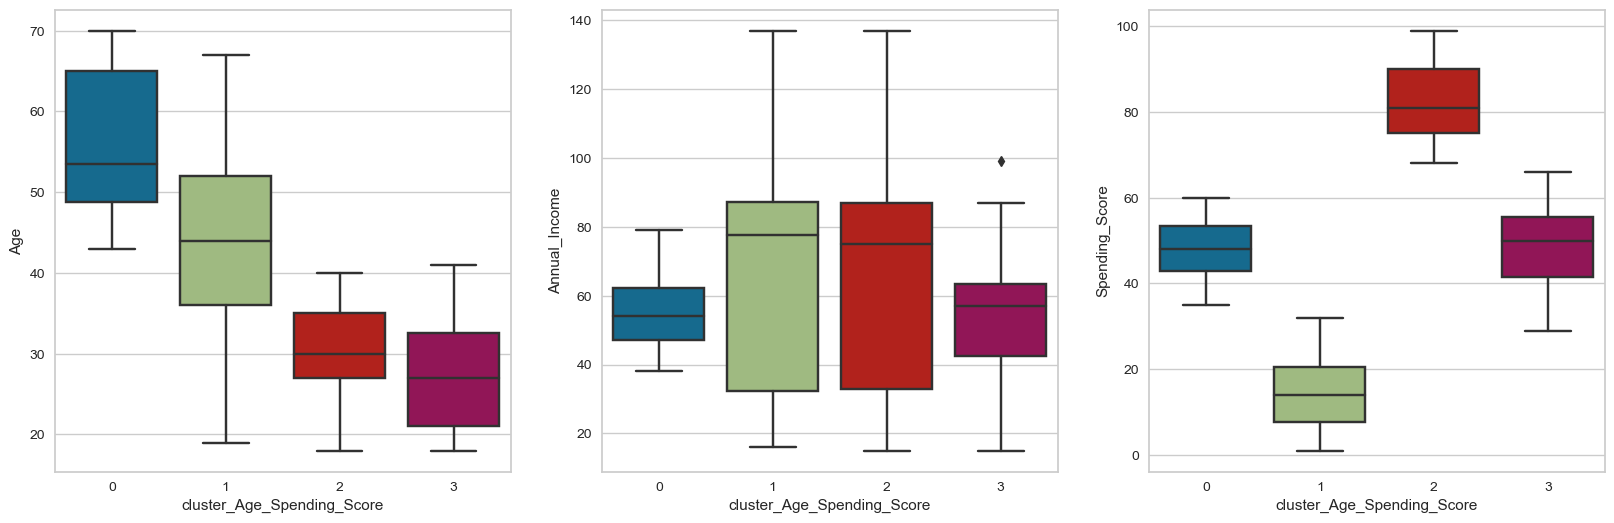

In [99]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Age_Spending_Score", data = df);

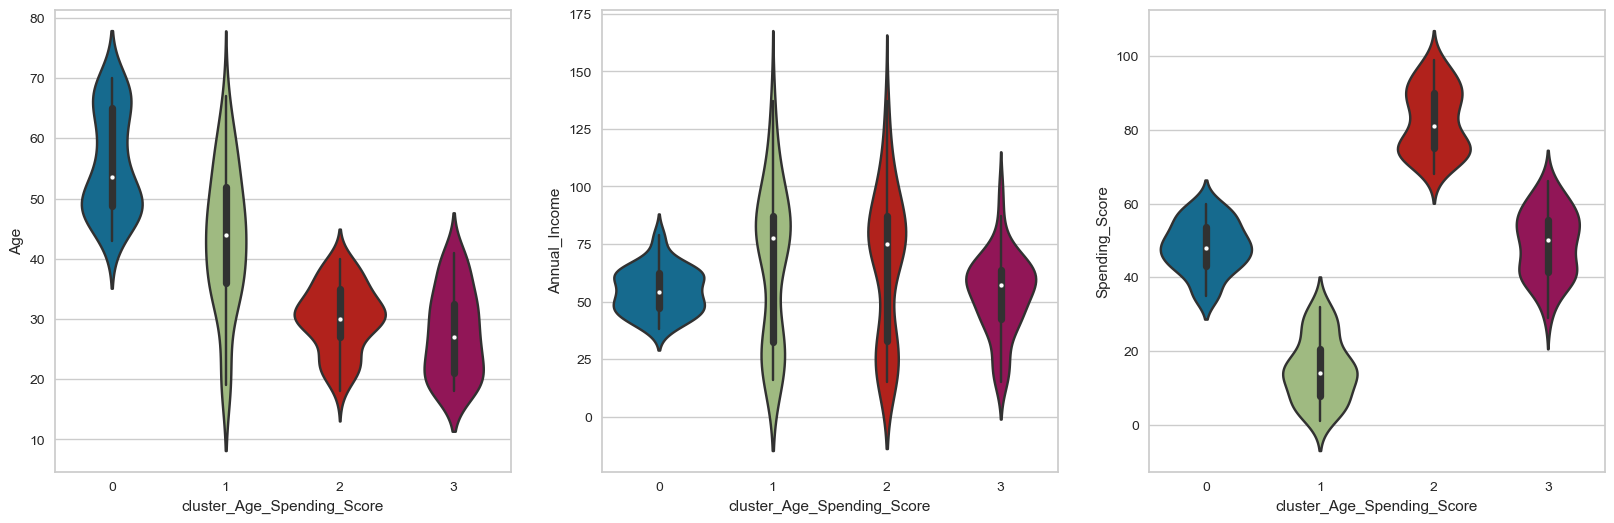

In [100]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.violinplot(y = "Age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.violinplot(y = "Annual_Income", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.violinplot(y = "Spending_Score", x = "cluster_Age_Spending_Score", data = df);

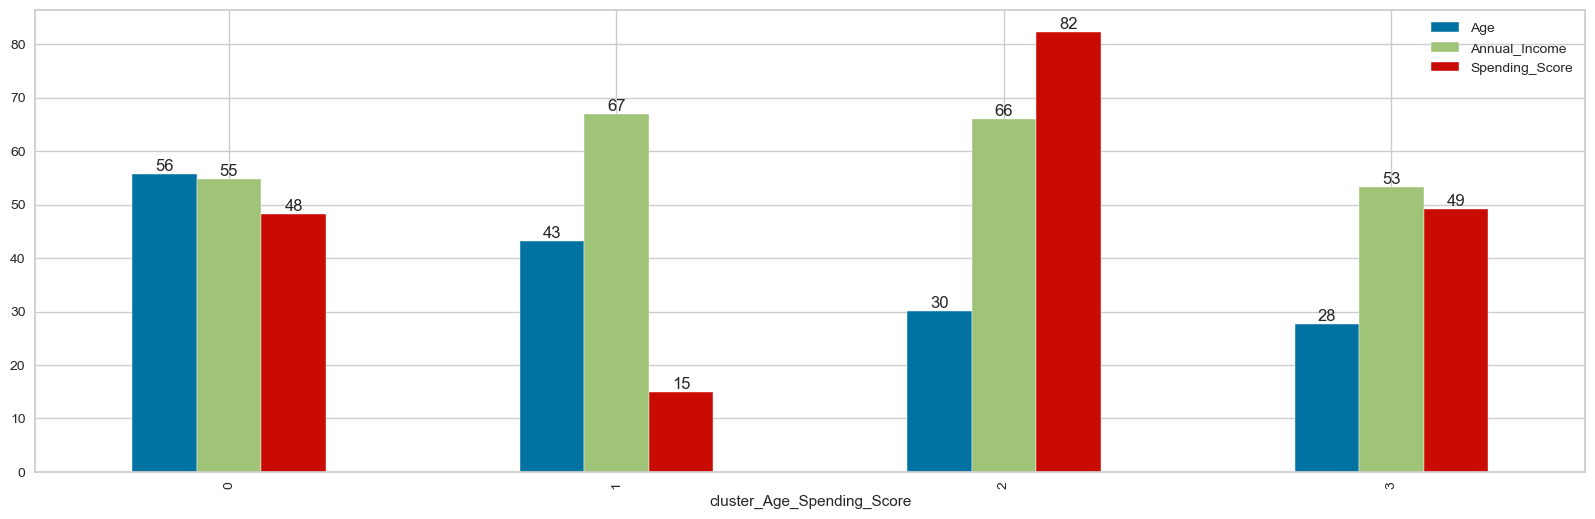

In [101]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f");

# df.groupby("cluster_Age_Spending_Score").mean()'i kullandığımıza dikkkat.

### Conclusion

**cluster 0** : The average age is around 56. both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43. the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 28. Both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score

In [102]:
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


In [103]:
df_ai_ss.cluster_Kmeans.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster_Kmeans, dtype: int64

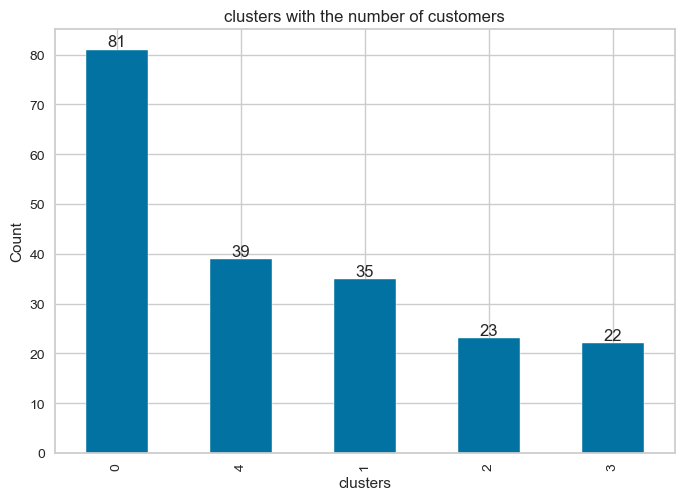

In [104]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_ai_ss.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [105]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


In [106]:
df.drop(columns= "cluster_Age_Spending_Score", inplace=True)

# Annual_Income ve Spending_Score'a göre Kmeans ile oluşturduğumuz cluster'lara göre sonuçlar çıkartmak için
# cluster_Age_Spending_Score'i drop ediyoruz.

In [107]:
df["cluster_Annual_Income_Spending_Score"] = df_ai_ss.cluster_Kmeans
df.head()
# cluster_Annual_Income_Spending_Score sütununu ekliyoruz.

,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


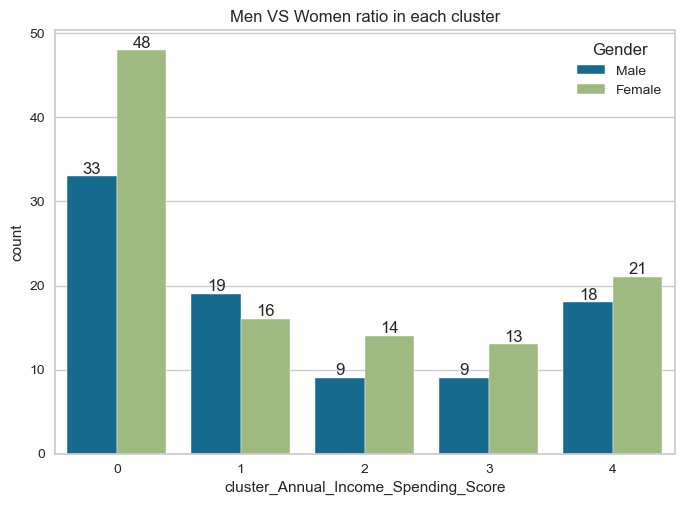

In [108]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [109]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

# burada hem Gender'a göre hem de cluster_Annual_Income_Spending_Score'a göre df'i gruplandırıyoruz.

Age  Annual_Income  \
Gender cluster_Annual_Income_Spending_Score                             
Female 0                                     40.895833      55.354167   
       1                                     43.250000      90.937500   
       2                                     43.214286      27.357143   
       3                                     25.461538      25.692308   
       4                                     32.190476      86.047619   
Male   0                                     45.363636      55.212121   
       1                                     39.315789      85.894737   
       2                                     48.333333      24.666667   
       3                                     25.000000      25.777778   
       4                                     33.277778      87.111111   

                                             Spending_Score  
Gender cluster_Annual_Income_Spending_Score                  
Female 0                                          49.000000  
       1                                          22.062500  
       2                                          21.714286  
       3                                          80.538462  
       4                                          81.666667  
Male   0                                          50.272727  
       1                                          12.947368  
       2                                          19.666667  
       3                                          77.666667  
       4                                          82.666667

<AxesSubplot:xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending_Score'>

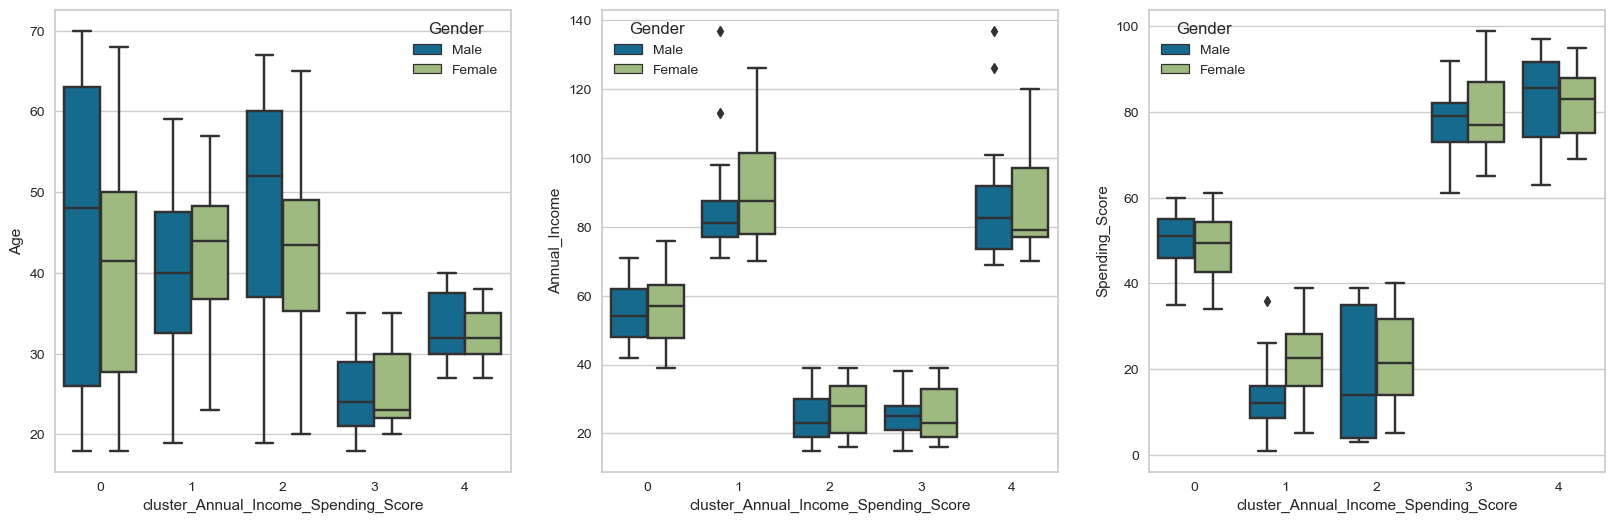

In [110]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df);

<AxesSubplot:xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending_Score'>

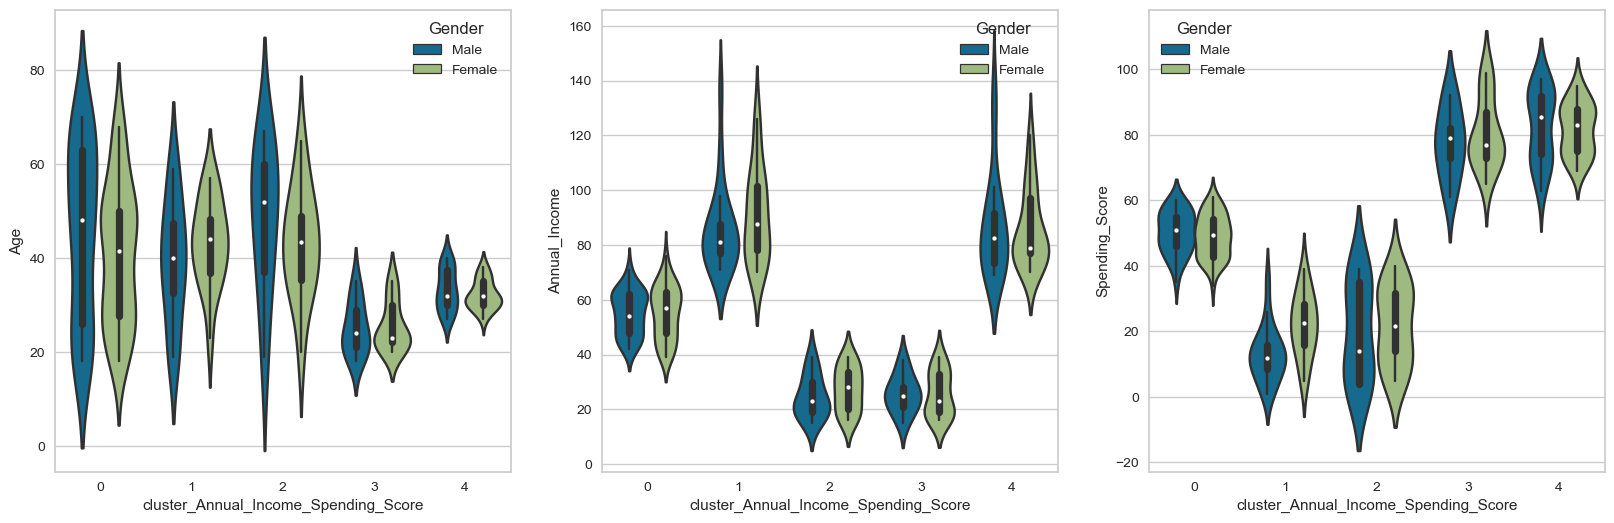

In [111]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.violinplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(132)
sns.violinplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(133)
sns.violinplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

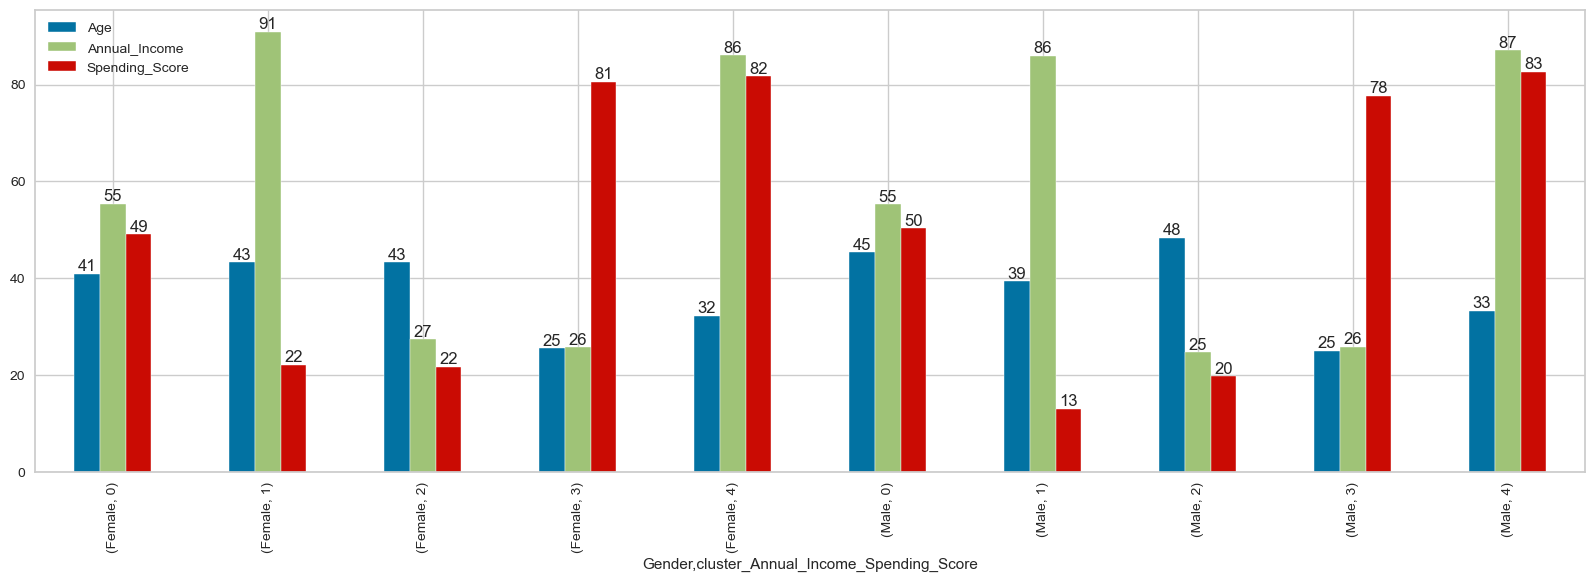

In [112]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

## Conclusion

### Female

**cluster 0** : The average age is around 41, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

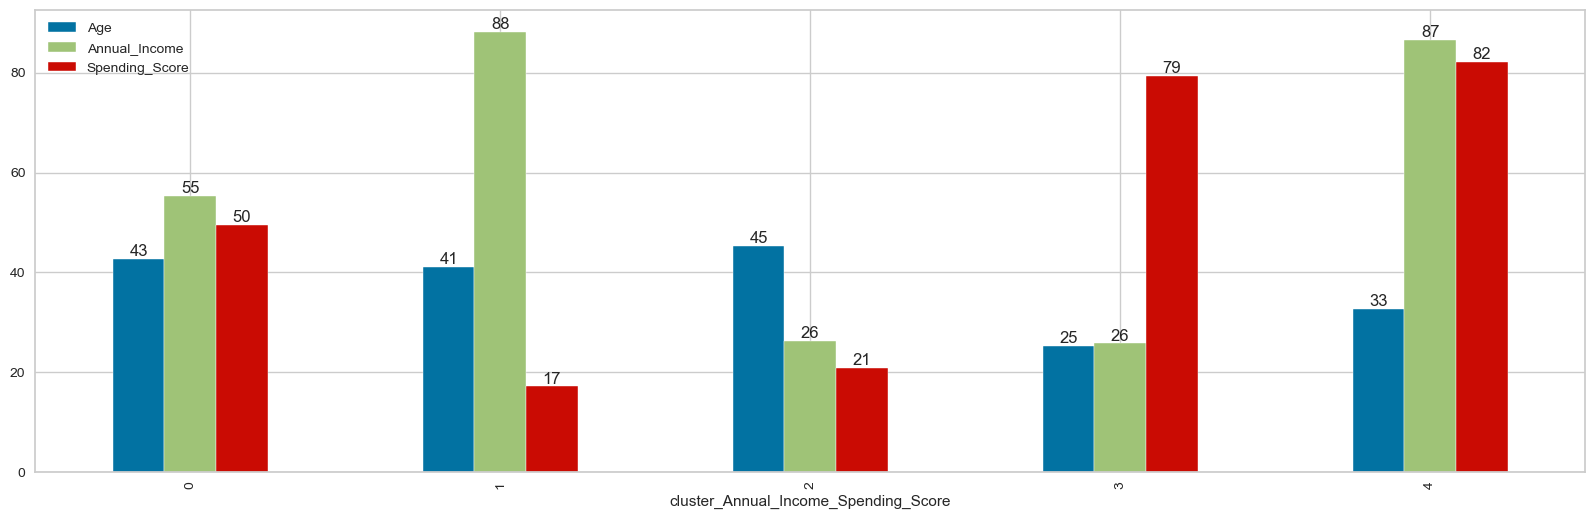

In [113]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 43, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 41, the annula_income is very high but the spending_scores is very low. This group is our target audience and special strategies need to be developed for this group.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___